In [98]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import re

In [99]:
df = pd.read_csv('raw_data.csv')

In [100]:
df.head()

,Address,Prices,Area,toFace,type,certificate,width,length,floors
0,"Đường Hà Mục, Phường Hòa Thọ Đông, Quận Cẩm L...","5,15 tỷ",100 m2,Tây Nam,Nhà mặt tiền,---,5m,20m,4
1,"Đường Thi Sách, Phường Hòa Thuận Tây, Quận Hả...","4,1 tỷ",85 m2,_,Nhà mặt tiền,---,---,---,1
2,"Đường Ông Ích Khiêm, Phường Tam Thuận, Quận T...",11 tỷ,67 m2,Tây,Nhà mặt tiền,Sổ hồng/ Sổ đỏ,"3,8m",---,3
3,"Đường Núi Thành, Phường Hòa Cường Bắc, Quận H...","17,5 tỷ",137 m2,Tây,Nhà mặt tiền,Sổ hồng/ Sổ đỏ,"7,3m",---,3
4,"Đường Trương Văn Hiến, Phường Khuê Mỹ, Quận N...",7 tỷ,90 m2,Đông Nam,Nhà mặt tiền,Sổ hồng/ Sổ đỏ,5m,18m,4


In [101]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14941 entries, 0 to 14940
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Address      14941 non-null  object
 1   Prices       14941 non-null  object
 2   Area         14941 non-null  object
 3   toFace       14941 non-null  object
 4   type         14941 non-null  object
 5   certificate  14941 non-null  object
 6   width        14941 non-null  object
 7   length       14941 non-null  object
 8   floors       14941 non-null  object
dtypes: object(9)
memory usage: 1.0+ MB


## Clean Data

### Prices

- Loại bỏ chữ tỷ trong cột prices
- Thay thế dấu ',' trong cột Prices thành dấu '.'
- Những cột nào định dạng sai không phải là số thì chuyển thành NaN

In [102]:
df['Prices'] = df['Prices'].apply(lambda x: x.strip(' tỷ ').replace(' ', ''))
df['Prices'] = df['Prices'].apply(lambda x: x.replace(',', '.'))
df.loc[:,'Prices'] = pd.to_numeric(df['Prices'], errors='coerce')

C:\Users\PC\AppData\Local\Temp\ipykernel_15796\632191419.py:3: DeprecationWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  df.loc[:,'Prices'] = pd.to_numeric(df['Prices'], errors='coerce')


In [103]:
df.head()

,Address,Prices,Area,toFace,type,certificate,width,length,floors
0,"Đường Hà Mục, Phường Hòa Thọ Đông, Quận Cẩm L...",5.15,100 m2,Tây Nam,Nhà mặt tiền,---,5m,20m,4
1,"Đường Thi Sách, Phường Hòa Thuận Tây, Quận Hả...",4.10,85 m2,_,Nhà mặt tiền,---,---,---,1
2,"Đường Ông Ích Khiêm, Phường Tam Thuận, Quận T...",11.00,67 m2,Tây,Nhà mặt tiền,Sổ hồng/ Sổ đỏ,"3,8m",---,3
3,"Đường Núi Thành, Phường Hòa Cường Bắc, Quận H...",17.50,137 m2,Tây,Nhà mặt tiền,Sổ hồng/ Sổ đỏ,"7,3m",---,3
4,"Đường Trương Văn Hiến, Phường Khuê Mỹ, Quận N...",7.00,90 m2,Đông Nam,Nhà mặt tiền,Sổ hồng/ Sổ đỏ,5m,18m,4


### Area

- Xóa 'm2'
- Những biến Area nào không phải định dạng là số thì chuyển vè NaN

In [104]:
df['Area'] = df['Area'].apply(lambda x: x.strip(' m2 ').replace(' ', '').replace('KXĐ',''))
df.loc[:,'Area'] = pd.to_numeric(df['Area'], errors='coerce')

C:\Users\PC\AppData\Local\Temp\ipykernel_15796\686885982.py:2: DeprecationWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  df.loc[:,'Area'] = pd.to_numeric(df['Area'], errors='coerce')


Những giá trị area nào bằng 0 thì chuyển về NaN

In [105]:
df.loc[df.Area==0,'Area']=np.nan

In [106]:
df.head()

,Address,Prices,Area,toFace,type,certificate,width,length,floors
0,"Đường Hà Mục, Phường Hòa Thọ Đông, Quận Cẩm L...",5.15,100.0,Tây Nam,Nhà mặt tiền,---,5m,20m,4
1,"Đường Thi Sách, Phường Hòa Thuận Tây, Quận Hả...",4.10,85.0,_,Nhà mặt tiền,---,---,---,1
2,"Đường Ông Ích Khiêm, Phường Tam Thuận, Quận T...",11.00,67.0,Tây,Nhà mặt tiền,Sổ hồng/ Sổ đỏ,"3,8m",---,3
3,"Đường Núi Thành, Phường Hòa Cường Bắc, Quận H...",17.50,137.0,Tây,Nhà mặt tiền,Sổ hồng/ Sổ đỏ,"7,3m",---,3
4,"Đường Trương Văn Hiến, Phường Khuê Mỹ, Quận N...",7.00,90.0,Đông Nam,Nhà mặt tiền,Sổ hồng/ Sổ đỏ,5m,18m,4


### toFace

In [107]:
df['toFace'].unique()

array(['Tây Nam', '_', 'Tây', 'Đông Nam', 'Đông', 'Tây Bắc', 'Bắc',
       'Đông Bắc', 'Nam'], dtype=object)

- Chuyển '_' về là 'Không'

In [108]:
df['toFace']=df['toFace'].apply(lambda x : x.replace('_', 'Không'))

In [109]:
df.head()

,Address,Prices,Area,toFace,type,certificate,width,length,floors
0,"Đường Hà Mục, Phường Hòa Thọ Đông, Quận Cẩm L...",5.15,100.0,Tây Nam,Nhà mặt tiền,---,5m,20m,4
1,"Đường Thi Sách, Phường Hòa Thuận Tây, Quận Hả...",4.10,85.0,Không,Nhà mặt tiền,---,---,---,1
2,"Đường Ông Ích Khiêm, Phường Tam Thuận, Quận T...",11.00,67.0,Tây,Nhà mặt tiền,Sổ hồng/ Sổ đỏ,"3,8m",---,3
3,"Đường Núi Thành, Phường Hòa Cường Bắc, Quận H...",17.50,137.0,Tây,Nhà mặt tiền,Sổ hồng/ Sổ đỏ,"7,3m",---,3
4,"Đường Trương Văn Hiến, Phường Khuê Mỹ, Quận N...",7.00,90.0,Đông Nam,Nhà mặt tiền,Sổ hồng/ Sổ đỏ,5m,18m,4


### Type

In [110]:
df['type'].unique()

array(['Nhà mặt tiền', 'Nhà trong hẻm'], dtype=object)

### Certificate

Các giá trị của biến Certificate

In [111]:
df['certificate'].unique()

array(['---', 'Sổ hồng/ Sổ đỏ', 'Giấy tờ hợp lệ'], dtype=object)

Thay đổi giá trị '---' thành 'Không có'

Thay đổi giá trị 'Giấy tờ hợp lệ' thành 'Sổ hồng/ Sổ đỏ'

In [112]:
df["certificate"] = df["certificate"].apply(lambda x: 'Không có' if x == "---" else 'Giấy tờ hợp lệ')

In [113]:
df.head()

,Address,Prices,Area,toFace,type,certificate,width,length,floors
0,"Đường Hà Mục, Phường Hòa Thọ Đông, Quận Cẩm L...",5.15,100.0,Tây Nam,Nhà mặt tiền,Không có,5m,20m,4
1,"Đường Thi Sách, Phường Hòa Thuận Tây, Quận Hả...",4.10,85.0,Không,Nhà mặt tiền,Không có,---,---,1
2,"Đường Ông Ích Khiêm, Phường Tam Thuận, Quận T...",11.00,67.0,Tây,Nhà mặt tiền,Giấy tờ hợp lệ,"3,8m",---,3
3,"Đường Núi Thành, Phường Hòa Cường Bắc, Quận H...",17.50,137.0,Tây,Nhà mặt tiền,Giấy tờ hợp lệ,"7,3m",---,3
4,"Đường Trương Văn Hiến, Phường Khuê Mỹ, Quận N...",7.00,90.0,Đông Nam,Nhà mặt tiền,Giấy tờ hợp lệ,5m,18m,4


### Width and Length

Loại bỏ các từ thừa

In [114]:
df['width'] = df['width'].apply(lambda x: x.strip(' m ').replace(' ', '').replace(',','.'))
df['width'] = df['width'].astype(str).apply(lambda x: re.sub(r'^\.', '', x)).apply(lambda x: re.sub(r'\D+', '.', x)).apply(lambda x: re.sub(r'\.$', '', x))

In [115]:
df['length'] = df['length'].apply(lambda x: x.strip(' m ').replace(' ', '').replace(',','.'))
df['length'] = df['length'].astype(str).apply(lambda x: re.sub(r'\.$', '', x)).apply(lambda x: re.sub(r'\.{2,}', '.', x))

Những giá trị không phải là số thì Chuyển thành NaN

In [116]:
df.loc[:,'width'] = pd.to_numeric(df['width'], errors='coerce')
df.loc[:,'length'] = pd.to_numeric(df['length'], errors='coerce')

C:\Users\PC\AppData\Local\Temp\ipykernel_15796\2836111748.py:1: DeprecationWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  df.loc[:,'width'] = pd.to_numeric(df['width'], errors='coerce')
C:\Users\PC\AppData\Local\Temp\ipykernel_15796\2836111748.py:2: DeprecationWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  df.loc[:,'length'] = pd.to_numeric(df['length'], errors='coerce')


Những giá trị length hoặc width nào bằng 0 thì chuyển thành NaN

In [117]:
df.loc[df.width==0,['width']]=np.nan
df.loc[df.length==0,['length']]=np.nan

In [118]:
df.head()

,Address,Prices,Area,toFace,type,certificate,width,length,floors
0,"Đường Hà Mục, Phường Hòa Thọ Đông, Quận Cẩm L...",5.15,100.0,Tây Nam,Nhà mặt tiền,Không có,5.0,20.0,4
1,"Đường Thi Sách, Phường Hòa Thuận Tây, Quận Hả...",4.10,85.0,Không,Nhà mặt tiền,Không có,NaN,NaN,1
2,"Đường Ông Ích Khiêm, Phường Tam Thuận, Quận T...",11.00,67.0,Tây,Nhà mặt tiền,Giấy tờ hợp lệ,3.8,NaN,3
3,"Đường Núi Thành, Phường Hòa Cường Bắc, Quận H...",17.50,137.0,Tây,Nhà mặt tiền,Giấy tờ hợp lệ,7.3,NaN,3
4,"Đường Trương Văn Hiến, Phường Khuê Mỹ, Quận N...",7.00,90.0,Đông Nam,Nhà mặt tiền,Giấy tờ hợp lệ,5.0,18.0,4


### Floors

Các giá trị của biến floors

In [119]:
df['floors'].unique()

array(['4', '1', '3', '2', '6', '---', '5', '8', '7', '10', '33', '9',
       '14', '11', '19', '34', '18', '123', '23', '15', '35', '25', '12',
       '17', '20', '28'], dtype=object)

Chuyển những giá trị '---' thành NaN

In [120]:
df.loc[:,'floors'] = pd.to_numeric(df['floors'], errors='coerce')

C:\Users\PC\AppData\Local\Temp\ipykernel_15796\4023322969.py:1: DeprecationWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  df.loc[:,'floors'] = pd.to_numeric(df['floors'], errors='coerce')


### Định dạng lại dữ liệu

In [121]:
df.head()

,Address,Prices,Area,toFace,type,certificate,width,length,floors
0,"Đường Hà Mục, Phường Hòa Thọ Đông, Quận Cẩm L...",5.15,100.0,Tây Nam,Nhà mặt tiền,Không có,5.0,20.0,4.0
1,"Đường Thi Sách, Phường Hòa Thuận Tây, Quận Hả...",4.10,85.0,Không,Nhà mặt tiền,Không có,NaN,NaN,1.0
2,"Đường Ông Ích Khiêm, Phường Tam Thuận, Quận T...",11.00,67.0,Tây,Nhà mặt tiền,Giấy tờ hợp lệ,3.8,NaN,3.0
3,"Đường Núi Thành, Phường Hòa Cường Bắc, Quận H...",17.50,137.0,Tây,Nhà mặt tiền,Giấy tờ hợp lệ,7.3,NaN,3.0
4,"Đường Trương Văn Hiến, Phường Khuê Mỹ, Quận N...",7.00,90.0,Đông Nam,Nhà mặt tiền,Giấy tờ hợp lệ,5.0,18.0,4.0


In [122]:
def convert(df, features,t):
    for feature in features:
        df[feature] = df[feature].astype(t)
features_int = ["floors"]
features_cat = ["type","certificate","toFace"]
features_float =["Prices","Area","width","length"]
convert(df,features_int,"Int64")
convert(df,features_cat,"category")
convert(df,features_float,"float64")

Sau khi định dạng 

In [123]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14941 entries, 0 to 14940
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   Address      14941 non-null  object  
 1   Prices       14875 non-null  float64 
 2   Area         14791 non-null  float64 
 3   toFace       14941 non-null  category
 4   type         14941 non-null  category
 5   certificate  14941 non-null  category
 6   width        12876 non-null  float64 
 7   length       10830 non-null  float64 
 8   floors       14586 non-null  Int64   
dtypes: Int64(1), category(3), float64(4), object(1)
memory usage: 759.5+ KB


In [124]:
df.describe()

,Prices,Area,width,length,floors
count,14875.000000,14791.000000,12876.000000,10830.000000,14586.0
mean,8.378236,87.218493,5.711354,18.190815,2.744344
std,11.268677,63.940995,5.113937,27.314063,1.995086
min,1.000000,0.103000,2.000000,1.000000,1.0
25%,3.600000,60.000000,4.500000,14.000000,2.0
50%,5.250000,80.000000,5.000000,17.500000,3.0
75%,8.800000,100.000000,5.500000,20.000000,3.0
max,315.000000,950.000000,420.000000,2020.000000,123.0


## Create new Feature

Tách trường Address thành:
- Street (Đường)
- Ward (Phường-Xã)
- District (Quận - Huyện)
- City (Thành Phố)

In [125]:
# df[['Street','Ward','District','City','','','']] = df['Address'].str.split(', ', expand=True)
df['Street']=df['Address'].str.split(', ', expand=True)[0]
df['Ward']=df['Address'].str.split(', ', expand=True)[1]
df['District']=df['Address'].str.split(', ', expand=True)[2]

Loại bỏ các trường "City", "Address" và sắp xếp lại thứ tự các trường

In [126]:
df = df.drop(['Address'], axis=1)
df = df[['Street','Ward','District', 'Prices', 'Area', 'toFace', 'type', 'certificate', 'width', 'length', 'floors']]
df.head()

,Street,Ward,District,Prices,Area,toFace,type,certificate,width,length,floors
0,Đường Hà Mục,Phường Hòa Thọ Đông,Quận Cẩm Lệ,5.15,100.0,Tây Nam,Nhà mặt tiền,Không có,5.0,20.0,4
1,Đường Thi Sách,Phường Hòa Thuận Tây,Quận Hải Châu,4.10,85.0,Không,Nhà mặt tiền,Không có,NaN,NaN,1
2,Đường Ông Ích Khiêm,Phường Tam Thuận,Quận Thanh Khê,11.00,67.0,Tây,Nhà mặt tiền,Giấy tờ hợp lệ,3.8,NaN,3
3,Đường Núi Thành,Phường Hòa Cường Bắc,Quận Hải Châu,17.50,137.0,Tây,Nhà mặt tiền,Giấy tờ hợp lệ,7.3,NaN,3
4,Đường Trương Văn Hiến,Phường Khuê Mỹ,Quận Ngũ Hành Sơn,7.00,90.0,Đông Nam,Nhà mặt tiền,Giấy tờ hợp lệ,5.0,18.0,4


Loại bỏ những giá trị không phải là quận, huyện ở Đà Nẵng 
    
('Quận Cẩm Lệ', 'Quận Hải Châu', 'Quận Thanh Khê', 'Quận Ngũ Hành Sơn', 'Quận Sơn Trà', 'Quận Liên Chiểu', 'Huyện Hòa Vang') 

In [127]:
df['District']= df['District'].str.lower()
District = ['quận cẩm lệ', 'quận hải châu', 'quận thanh khê',
       'quận ngũ hành sơn', 'quận sơn trà', 'quận liên chiểu','huyện hòa vang']
df = df.loc[df['District'].isin(District)]
df.loc[:,'District'] = df['District'].str.replace("quận ","")
df.loc[:,'District'] = df['District'].str.replace("huyện ","")

In [128]:
df.loc[:,'Ward'] = df['Ward'].str.replace("Phường ","")
df.loc[:,'Street'] = df['Street'].str.replace("Đường ","")

In [129]:
df['District'].unique()

array(['cẩm lệ', 'hải châu', 'thanh khê', 'ngũ hành sơn', 'sơn trà',
       'liên chiểu', 'hòa vang'], dtype=object)

Thêm một trường Location theo Address của ngôi nhà

Sử dụng API của BingMap để lấy latitude, Longitude theo địa chỉ của ngôi nhà

In [130]:
import requests

# Địa chỉ cần tìm tọa độ
address = "Đường Huyền Trân Công Chúa, Ngũ Hành Sơn, Đà Nẵng, Việt Nam"

# Tạo URL request
url = "https://dev.virtualearth.net/REST/v1/Locations"

# Gửi yêu cầu HTTP
def getLocation(Address):
    params = {
        "q": Address,
        "key": "AuCD3WhuOOT5HhbRcvJAt1DyK293gMNSAfPSTcgaXGlrVlVTRpXs06BWdTexjaOA"
    }
    response = requests.get(url, params=params)
    data = response.json()
    # Kiểm tra xem có kết quả tọa độ hay không
    if "resourceSets" in data and len(data["resourceSets"]) > 0 and "resources" in data["resourceSets"][0] and len(data["resourceSets"][0]["resources"]) > 0:
        coordinates = data["resourceSets"][0]["resources"][0]["point"]["coordinates"]
        latitude = coordinates[0]
        longitude = coordinates[1]
        location = str(latitude)+","+str(longitude)
        return location
    else:
        return np.nan


In [131]:
# Address = df['Street']+', '+df['District']+', Đà Nẵng, Việt Nam'
# df['Location']=Address.apply(lambda x: getLocation(x))
# df.to_csv('clean_data.csv')

In [132]:
df = pd.read_csv('clean_data2.csv')

In [133]:
df.head()

,Unnamed: 0,Street,Ward,District,Prices,Area,toFace,type,certificate,width,length,floors,Location,Latitude,Longitude,DistanceToCenter,DistanceToBeach
0,0,Hà Mục,Hòa Thọ Đông,cẩm lệ,5.15,100.0,Tây Nam,Nhà mặt tiền,Không có,5.0,20.0,4.0,"16.01918,108.19537",16.01918,108.19537,5.750916,7.862720
1,1,Thi Sách,Hòa Thuận Tây,hải châu,4.10,85.0,Không,Nhà mặt tiền,Không có,NaN,NaN,1.0,"16.0546,108.20547",16.05460,108.20547,2.389182,4.683770
2,2,Ông Ích Khiêm,Tam Thuận,thanh khê,11.00,67.0,Tây,Nhà mặt tiền,Giấy tờ hợp lệ,3.8,NaN,3.0,"16.06653,108.2142",16.06653,108.21420,1.465144,3.435286
3,3,Núi Thành,Hòa Cường Bắc,hải châu,17.50,137.0,Tây,Nhà mặt tiền,Giấy tờ hợp lệ,7.3,NaN,3.0,"16.03194,108.22279",16.03194,108.22279,3.281117,4.948860
4,4,Trương Văn Hiến,Khuê Mỹ,ngũ hành sơn,7.00,90.0,Đông Nam,Nhà mặt tiền,Giấy tờ hợp lệ,5.0,18.0,4.0,"16.01947,108.25592",16.01947,108.25592,5.590678,5.759550


Tạo thêm 2 trường 
- DistanceToCenter (Khoảng cách đến trung tâm thành phố)
- DistanceToBeach (Khoảng cách đến biển)

In [134]:
tttp = (16.061203,108.226744)
beach = (16.0704,108.2461)
airport = (16.043889 ,108.199444)
def distance(l1,l2):
    # return (np.sqrt((l1[0]-l2[0])**2+(l1[1]-l2[1])**2)*1000)
    lat1_rad = np.radians(l1[0])
    lon1_rad = np.radians(l1[1])
    lat2_rad = np.radians(l2[0])
    lon2_rad = np.radians(l2[1])

    # Tính khoảng cách
    delta_lat = lat2_rad - lat1_rad
    delta_lon = lon2_rad - lon1_rad
    a = np.sin(delta_lat / 2) ** 2 + np.cos(lat1_rad) * np.cos(lat2_rad) * np.sin(delta_lon / 2) ** 2
    c = 2 * np.arctan2(np.sqrt(a), np.sqrt(1 - a))
    radius = 6371  # Bán kính trái đất (đơn vị: kilômét)
    distance = radius * c
    return distance

df['Latitude'] = (df['Location'].str.split(',',expand=True)[0])
df['Longitude'] = df['Location'].str.split(',',expand=True)[1]

In [135]:
df['Latitude']=df['Latitude'].astype('float32')
df['Longitude']=df['Longitude'].astype('float32')
df['DistanceToCenter'] = distance(tttp,(np.float64(df['Latitude']),np.float64(df['Longitude'])))
df['DistanceToBeach']= distance(beach,(np.float64(df['Latitude']),np.float64(df['Longitude'])))

In [136]:
df.head()

,Unnamed: 0,Street,Ward,District,Prices,Area,toFace,type,certificate,width,length,floors,Location,Latitude,Longitude,DistanceToCenter,DistanceToBeach
0,0,Hà Mục,Hòa Thọ Đông,cẩm lệ,5.15,100.0,Tây Nam,Nhà mặt tiền,Không có,5.0,20.0,4.0,"16.01918,108.19537",16.01918,108.195374,5.750916,7.862720
1,1,Thi Sách,Hòa Thuận Tây,hải châu,4.10,85.0,Không,Nhà mặt tiền,Không có,NaN,NaN,1.0,"16.0546,108.20547",16.05460,108.205467,2.389182,4.683770
2,2,Ông Ích Khiêm,Tam Thuận,thanh khê,11.00,67.0,Tây,Nhà mặt tiền,Giấy tờ hợp lệ,3.8,NaN,3.0,"16.06653,108.2142",16.06653,108.214203,1.465144,3.435286
3,3,Núi Thành,Hòa Cường Bắc,hải châu,17.50,137.0,Tây,Nhà mặt tiền,Giấy tờ hợp lệ,7.3,NaN,3.0,"16.03194,108.22279",16.03194,108.222794,3.281117,4.948860
4,4,Trương Văn Hiến,Khuê Mỹ,ngũ hành sơn,7.00,90.0,Đông Nam,Nhà mặt tiền,Giấy tờ hợp lệ,5.0,18.0,4.0,"16.01947,108.25592",16.01947,108.255920,5.590678,5.759550


## Mising Data

Thay thế giá trị trống của trường Prices, Area, floors bằng mean

In [137]:
df['Prices']=df['Prices'].fillna(df['Prices'].mean())
df['Area']=df['Area'].fillna(df['Area'].mean())
df['floors']=df['floors'].fillna(int(df['floors'].mean()))


Trường Width và Length

- Nếu giá trị width khác rỗng và length là rỗng thì: length = area/width
- Ngược lại thì: width = area/length
- Cả hai là rỗng thì length = width = sqrt(area)

In [138]:
df.loc[(df.width.isnull()) & (df.length.notnull()),['width']] = (df['Area'])/(df['length'])
df.loc[(df.width.notnull()) & (df.length.isnull()),['length']] = (df['Area'])/(df['width'])
df.loc[(df.width.isnull()) & (df.length.isnull()),['width','length']] = np.sqrt(df['Area'])

## Feature Selection (QKhang)

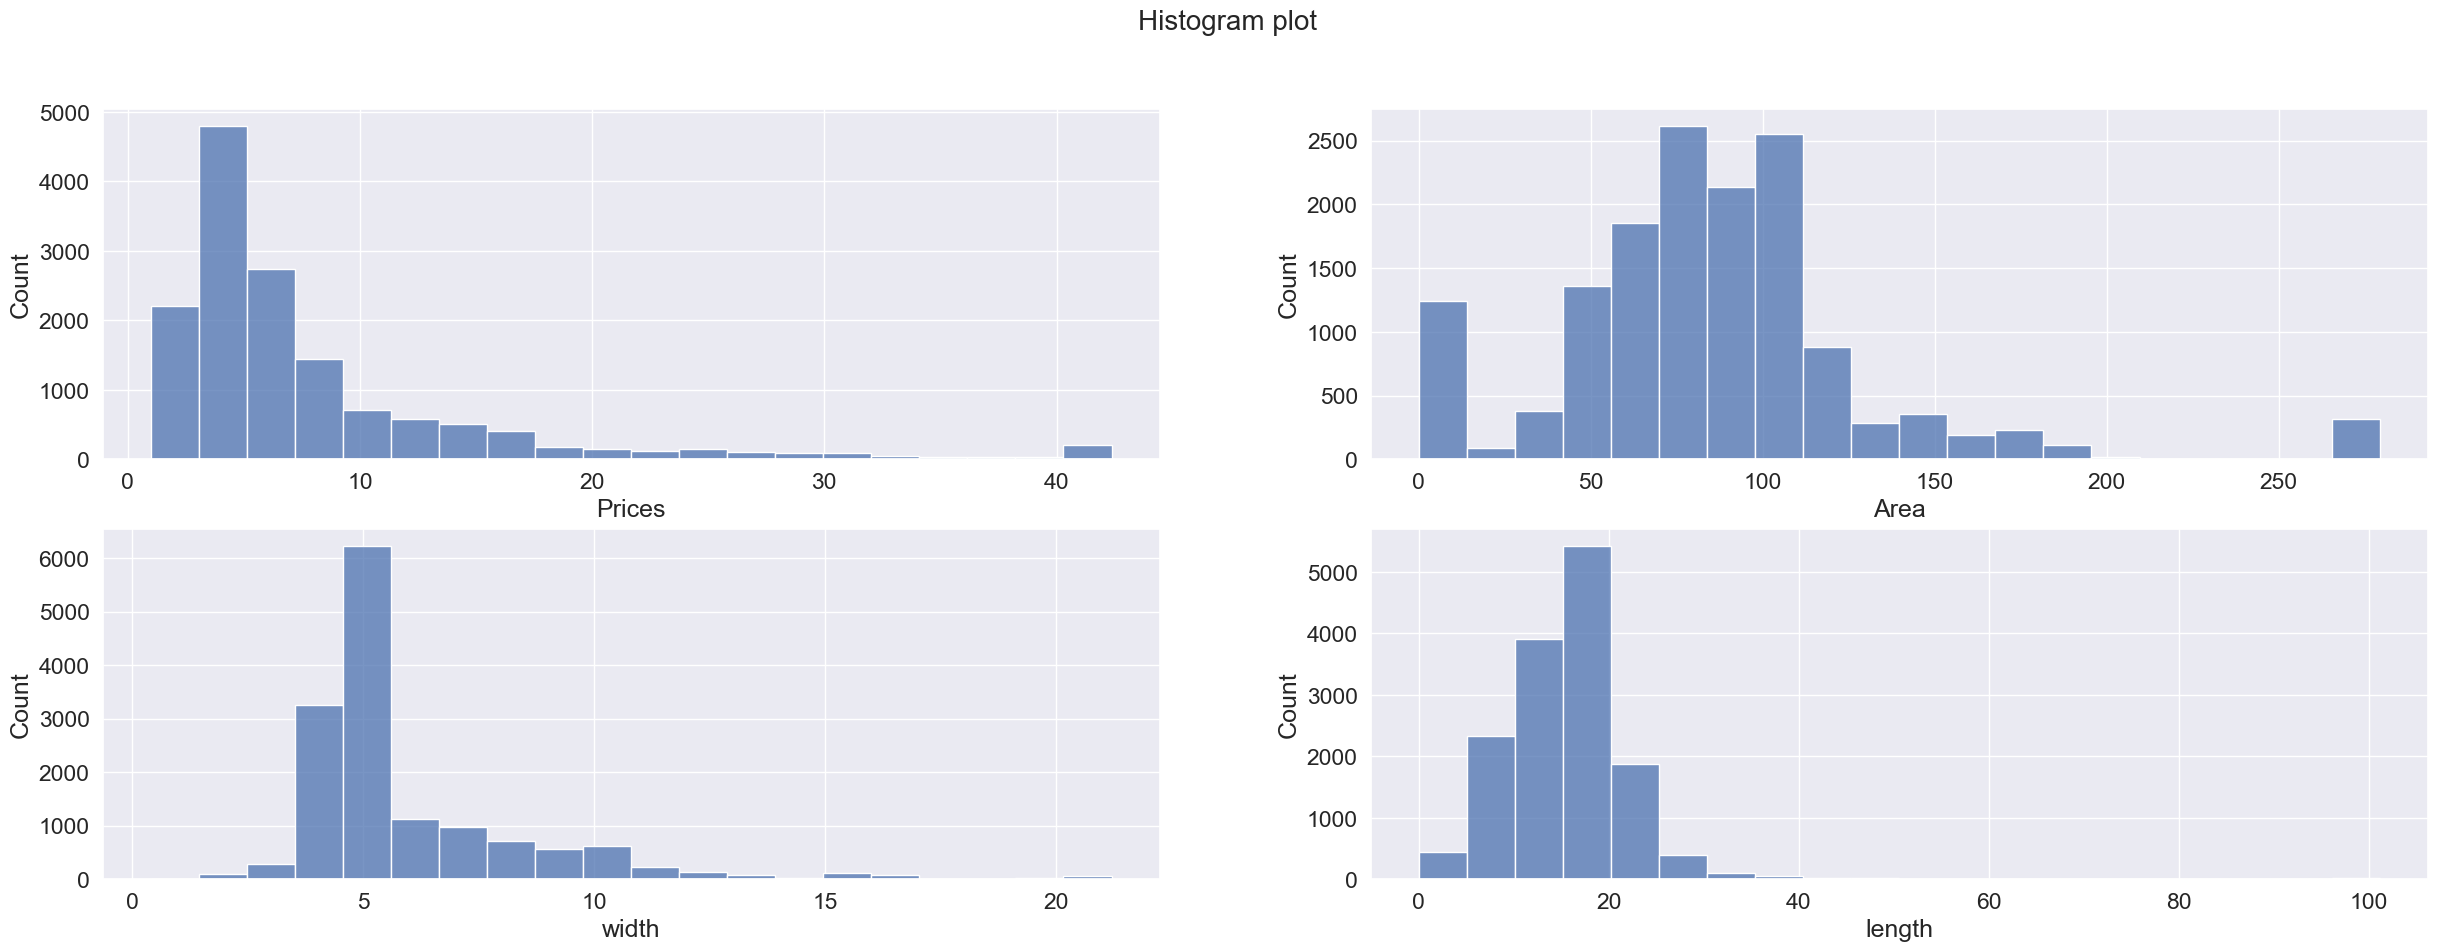

In [139]:
NummericData = ['Prices','Area','width','length']
fig = plt.figure(figsize = (30,10))
fig.suptitle("Histogram plot", fontsize = 20)
for i in enumerate(NummericData):
    axe = fig.add_subplot(2,2, i[0]+1)
    sns.histplot(x=df[i[1]], ax = axe, bins=20)

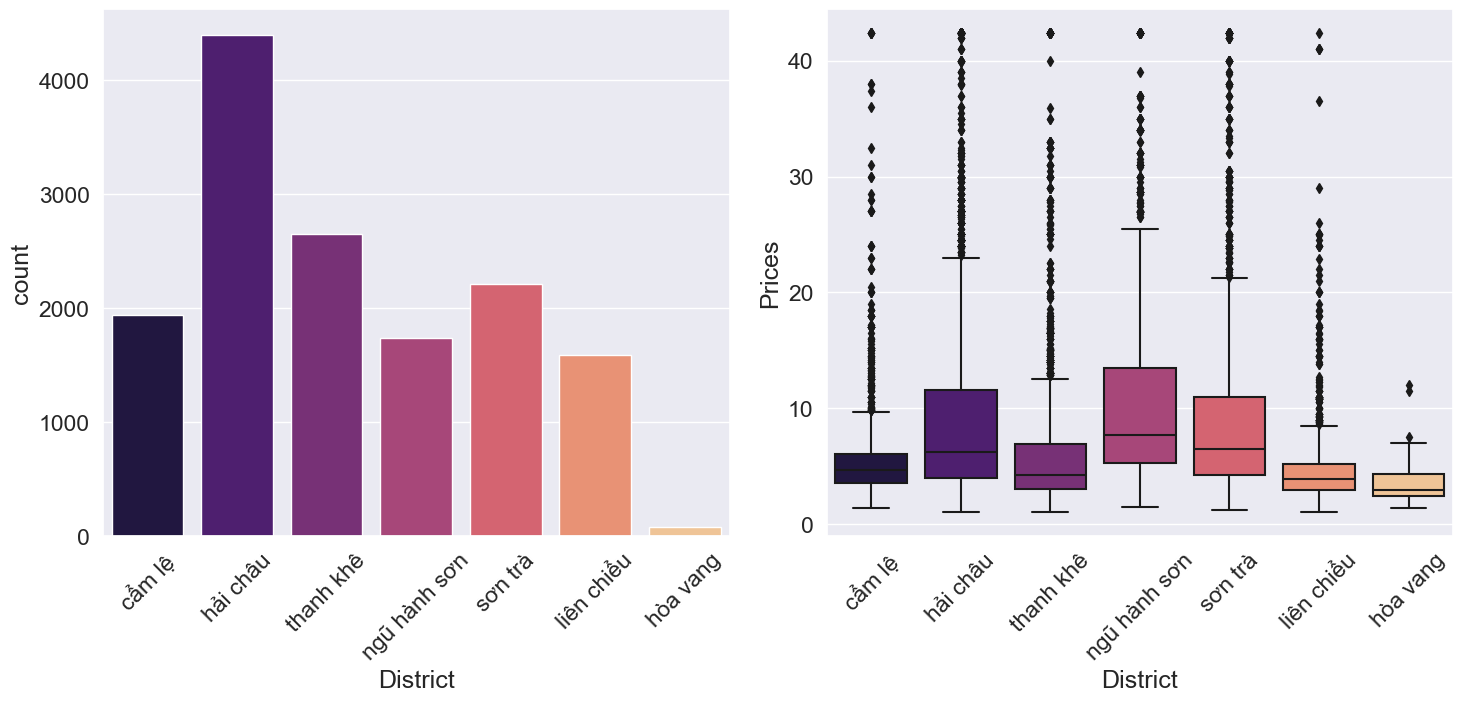

In [140]:
def plot_count(x,fig):
    plt.subplot(3,2,fig)
    ax1 = sns.countplot(x=df[x],palette=("magma"))
    ax1.set_xticklabels(df[x].unique(), rotation = 45)
    plt.subplot(3,2,(fig+1))
    ax2 = sns.boxplot(x=df[x], y=df.Prices, palette=("magma"))
    ax2.set_xticklabels(df[x].unique(), rotation = 45)
    
plt.figure(figsize=(15,20))
plot_count('District', 1)
plt.tight_layout()

Nhận xét:
- Nhận thấy rằng Số lượng nhà ở quận Hải Châu là nhiều nhất

- Giá nhà ở quận Ngũ Hành Sơn là cao nhất

Vì vậy giá nhà và vị trí quận huyện tương quan với nhau

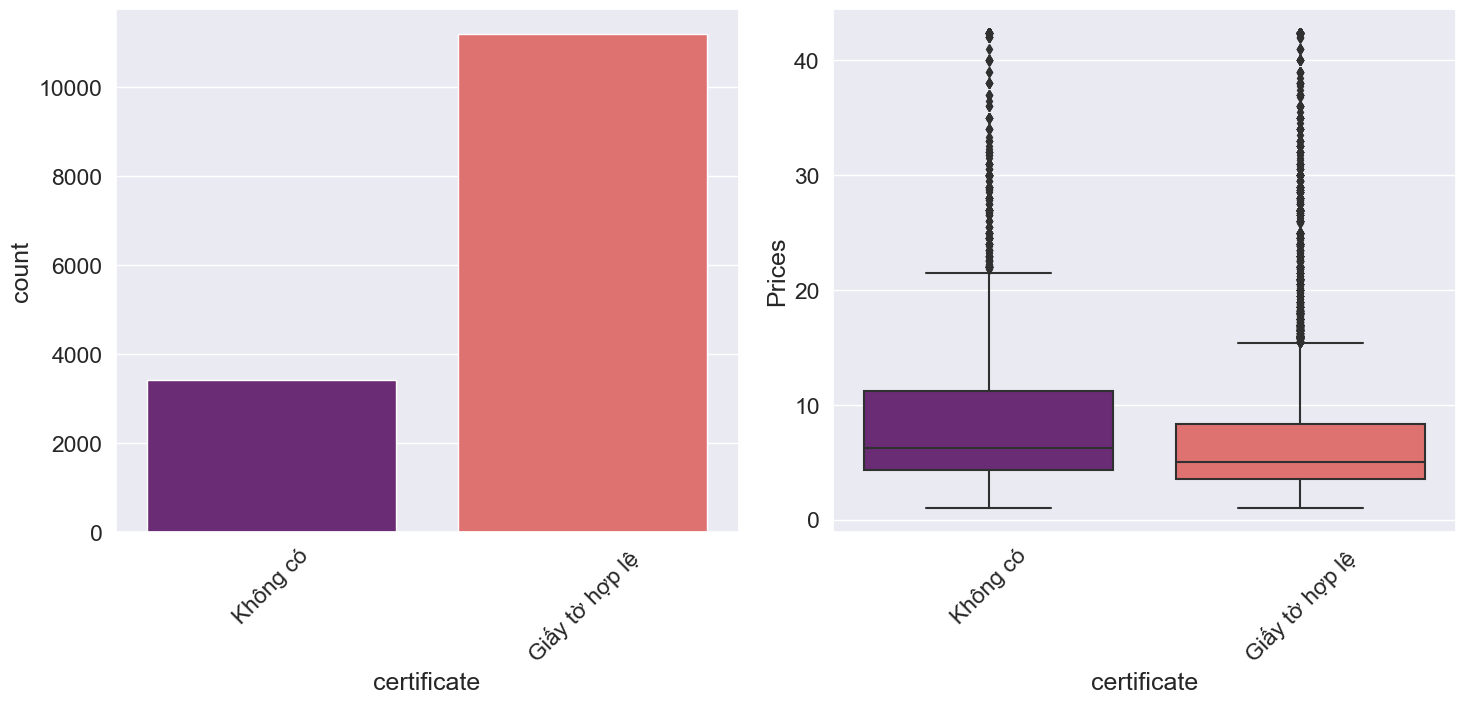

In [141]:
plt.figure(figsize=(15,20))
plot_count('certificate', 1)
plt.tight_layout()

Nhận xét:
- Nhà có giấy tờ đầy đủ thì có giá bán cao hơn nhà không có giấy tờ

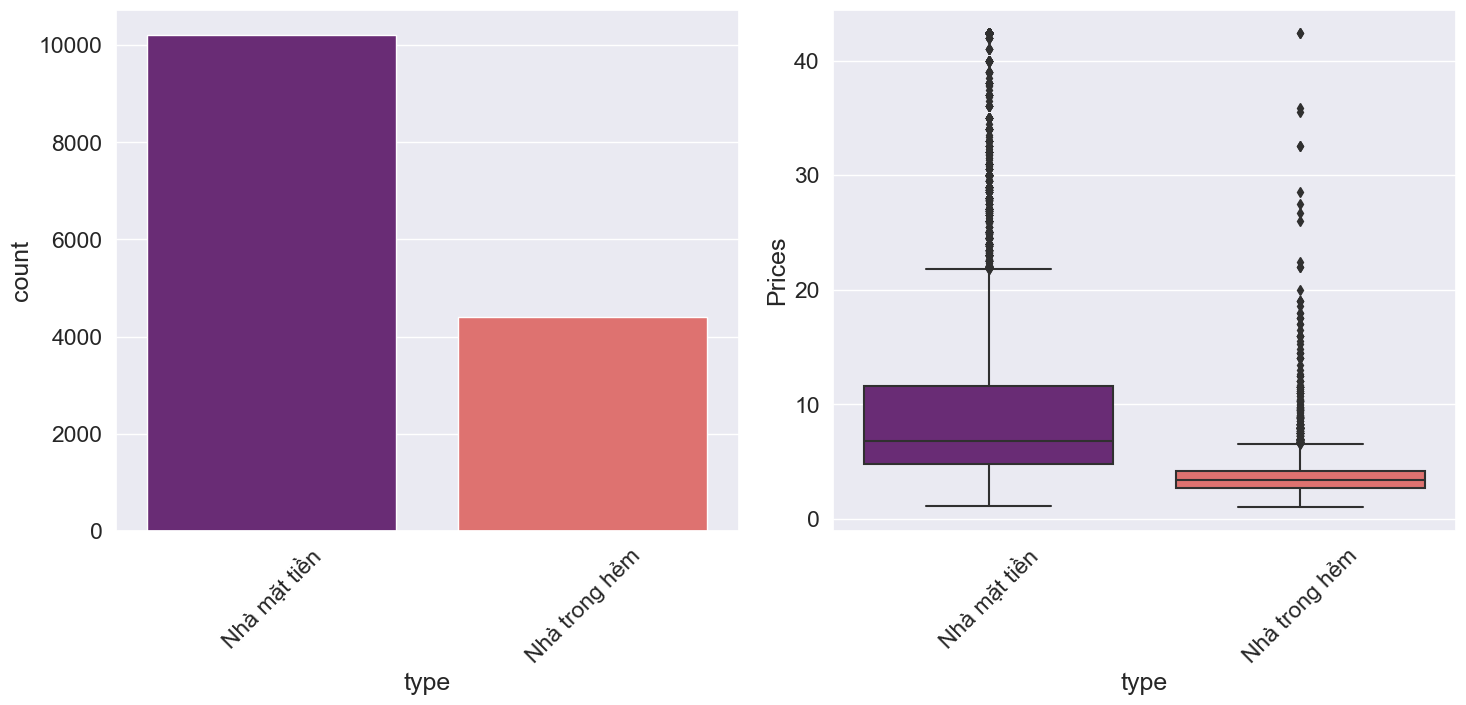

In [142]:
plt.figure(figsize=(15,20))
plot_count('type', 1)
plt.tight_layout()

Nhận xét:

- Những nhà ở mặt tiền thì có giá cao bơn những nhà ở trong hẻm

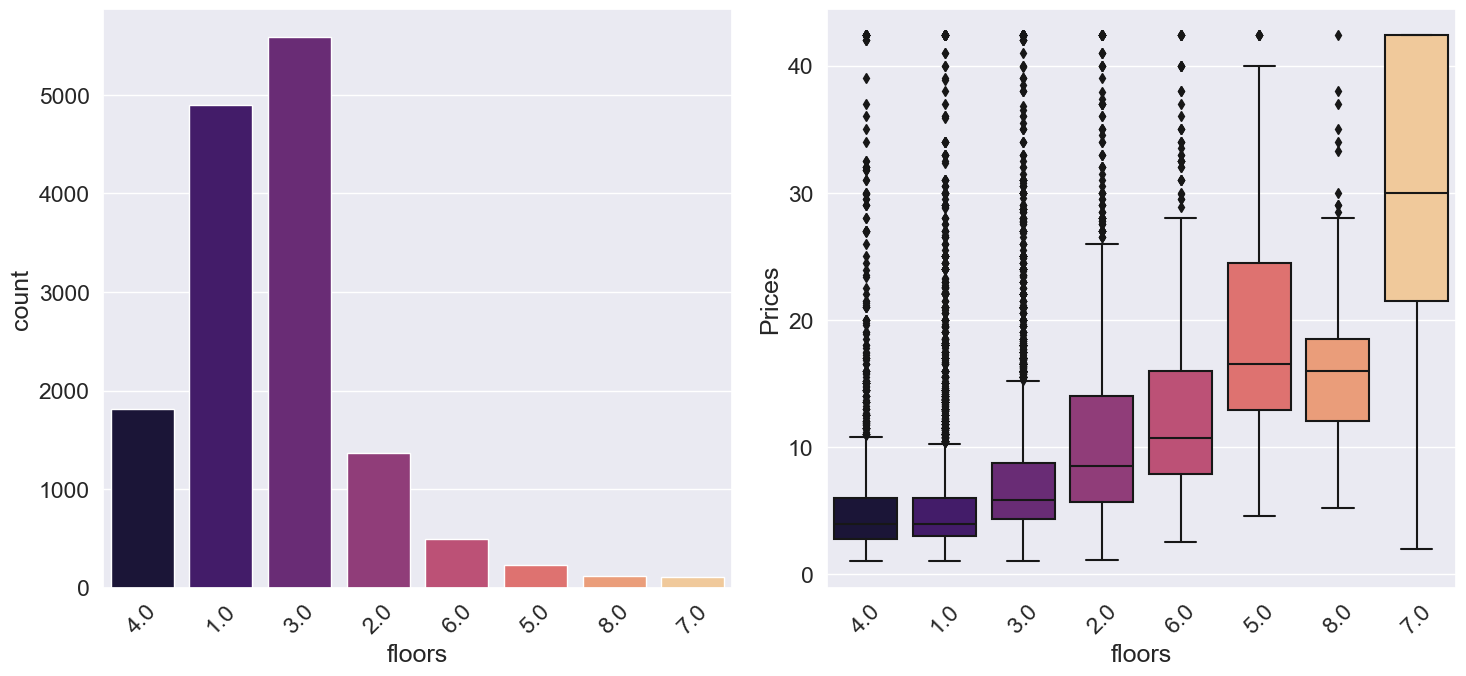

In [143]:
plt.figure(figsize=(15,20))
plot_count('floors', 1)
plt.tight_layout()

Nhận xét:
- Nhà 1 và 2 tầng được bán nhiều nhất
- Nhà cành nhiều tầng thì giá càng cao

floors tương quan với Prices

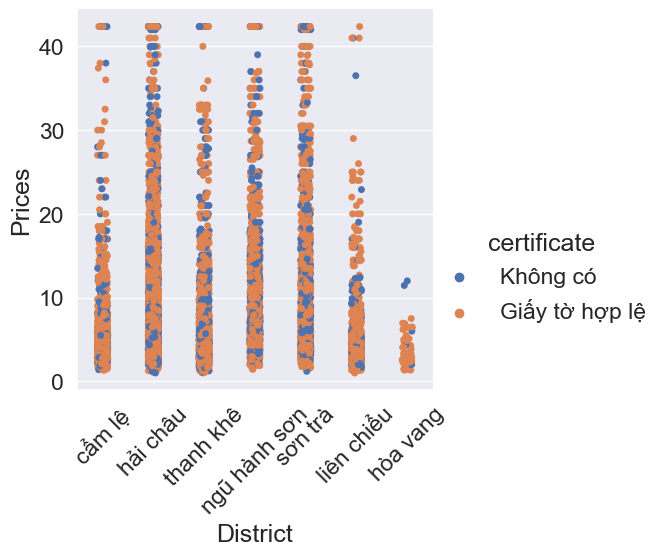

In [144]:
axis = sns.catplot(data= df,x='District',y='Prices',hue='certificate')
axis.set_xticklabels(df['District'].unique(), rotation = 45)

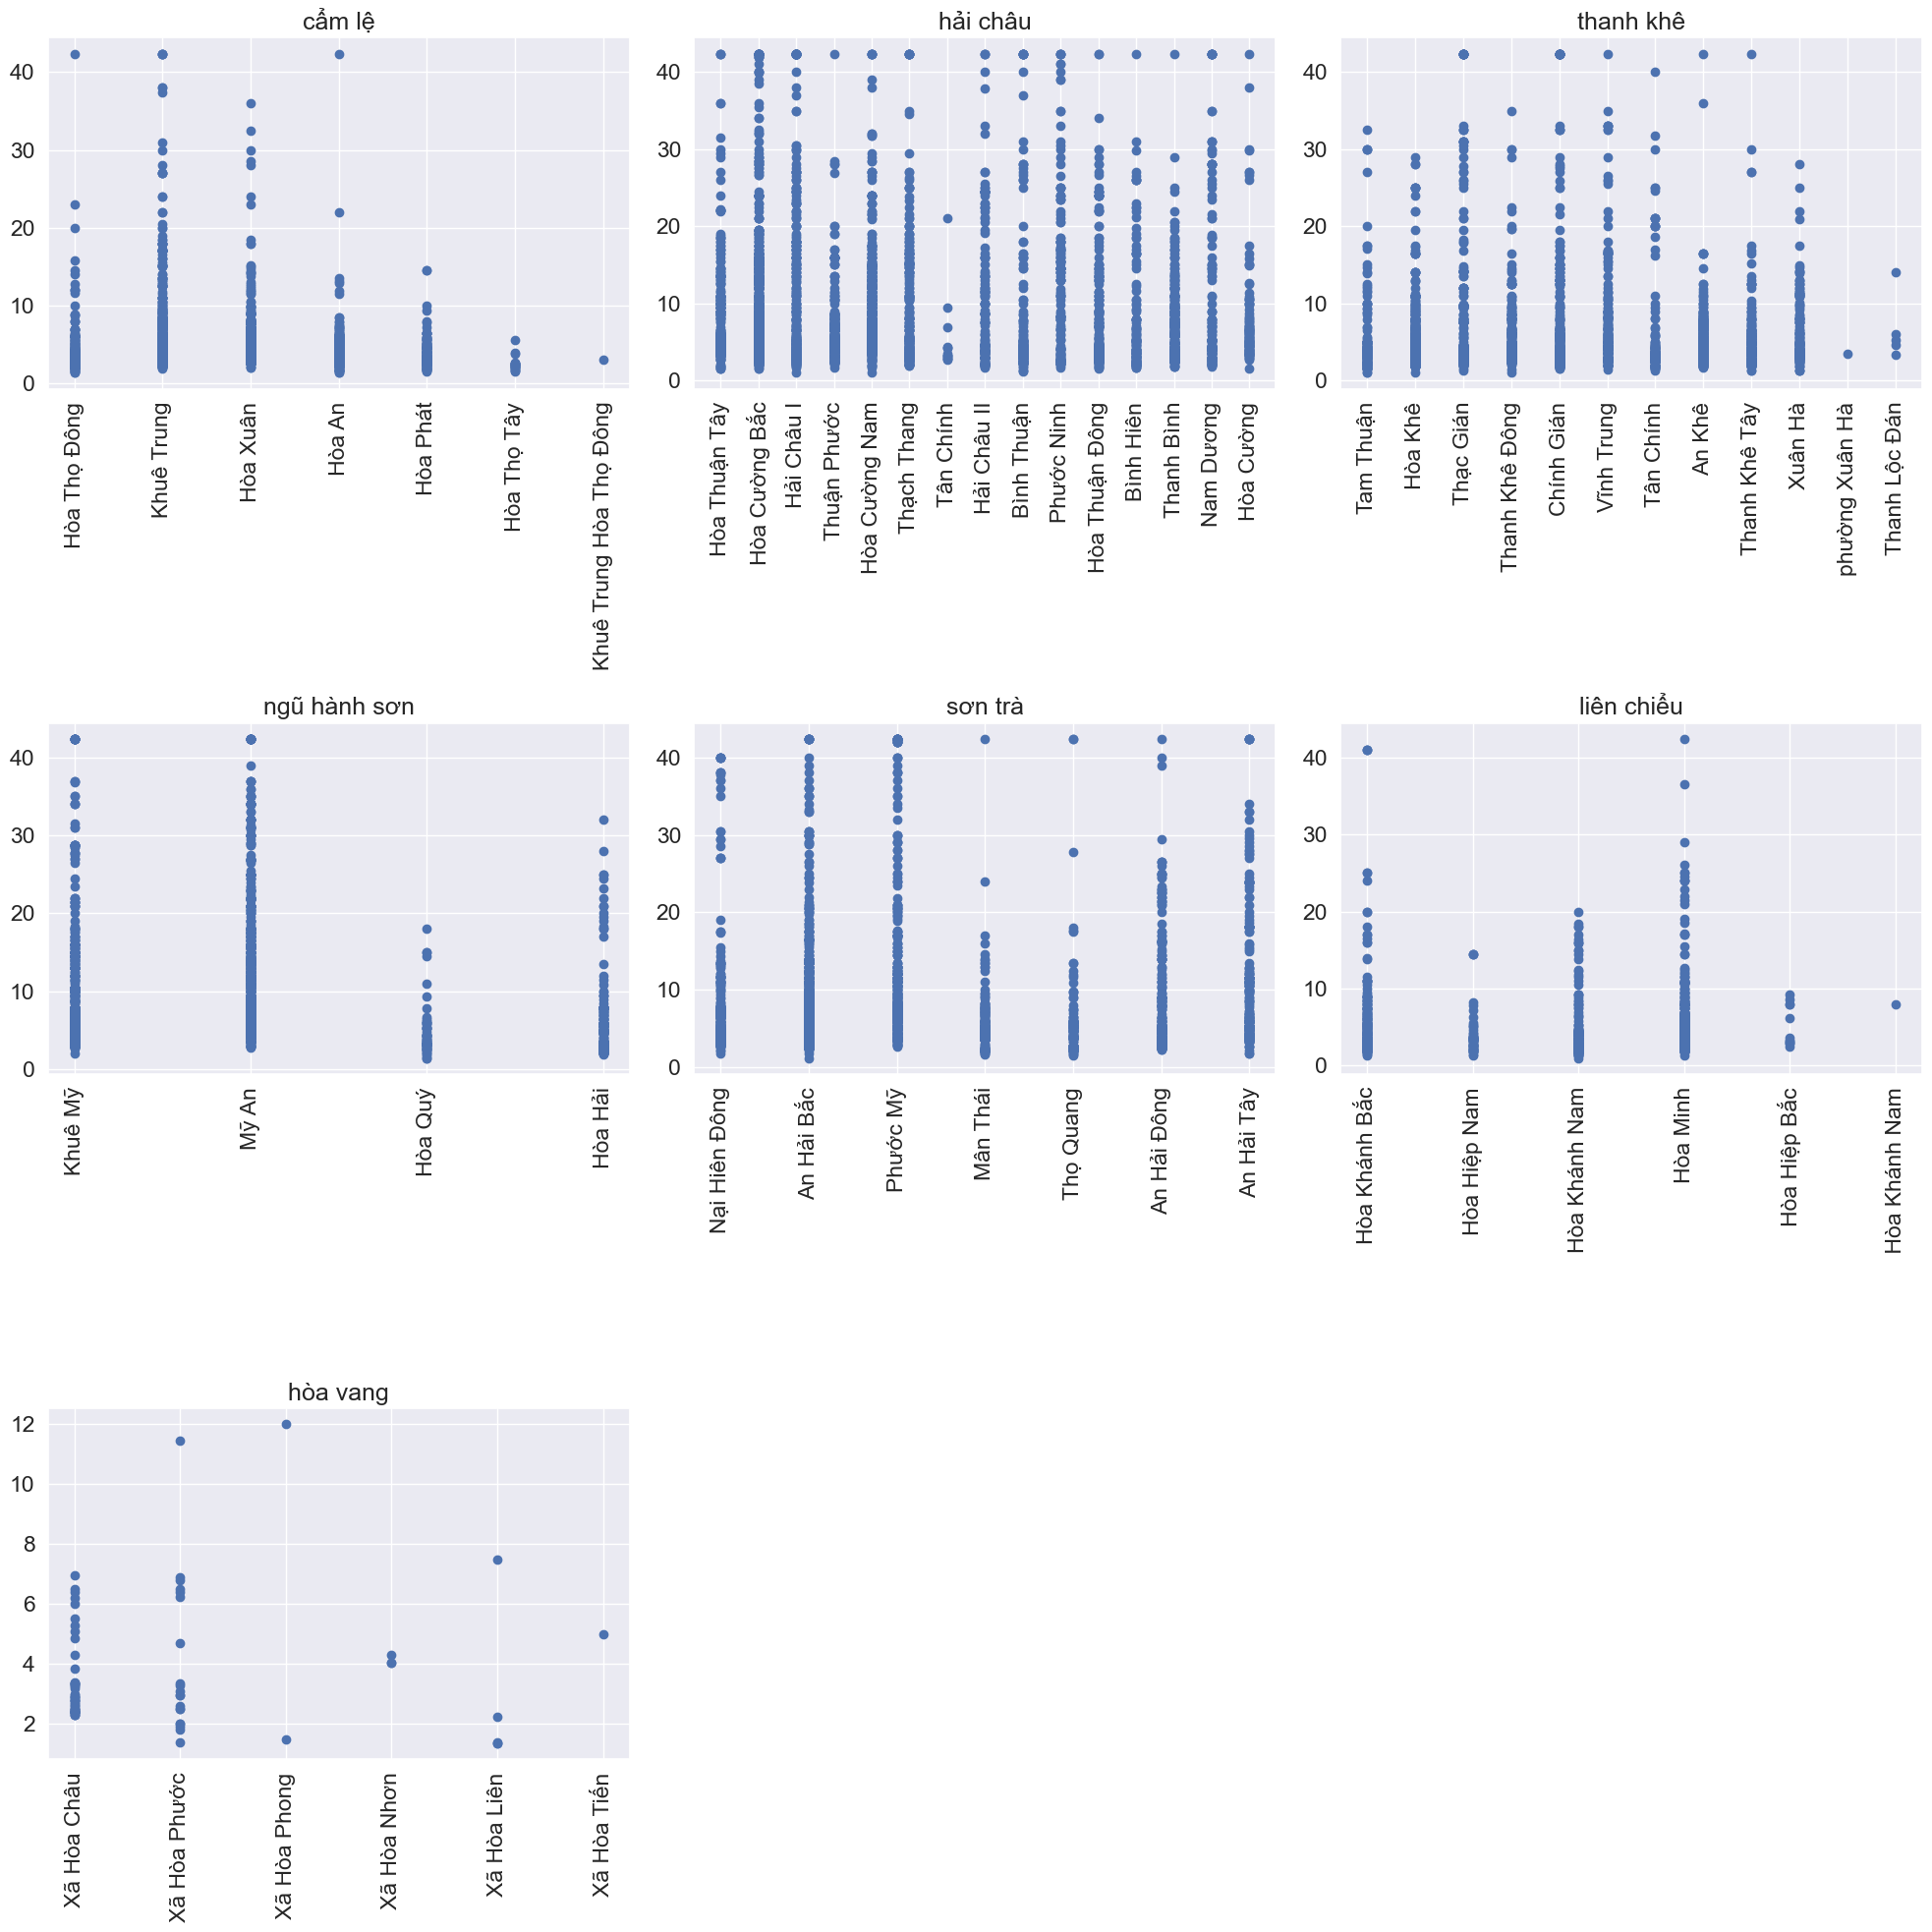

In [145]:

count =1
plt.figure(figsize=(20,20))
for i in df['District'].unique():
    PricesByWard = df[df.District == i]

    sns.set(font_scale = 1.5)
    plt.subplot(3,3,count)
    plt.scatter(PricesByWard['Ward'],PricesByWard['Prices'])
    plt.title(i)

    plt.xticks(rotation=90)
    count+=1


plt.tight_layout()


Nhận xét:
- Nhà ở các phường khác nhau thì có giá khác nhau

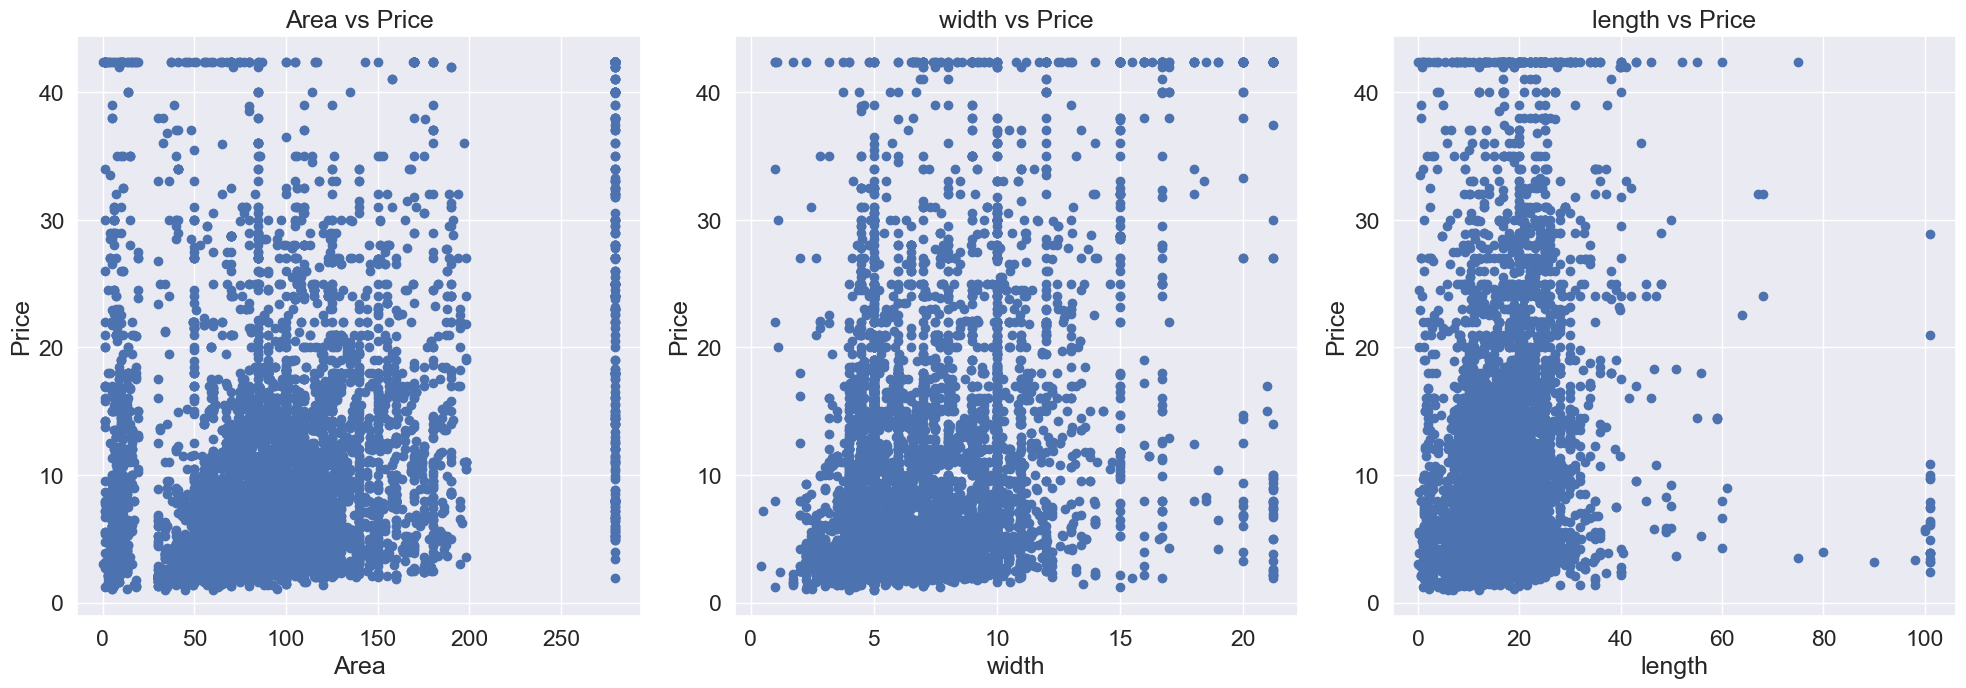

In [146]:
def scatter(x,fig):
    sns.set(font_scale = 1.5)
    plt.subplot(3,3,fig)
    plt.scatter(df[x],df['Prices'])
    plt.title(x+' vs Price')
    plt.ylabel('Price')
    plt.xlabel(x)

plt.figure(figsize=(20,20))

scatter('Area', 1)
scatter('width', 2)
scatter('length', 3)

plt.tight_layout()

<Axes: >

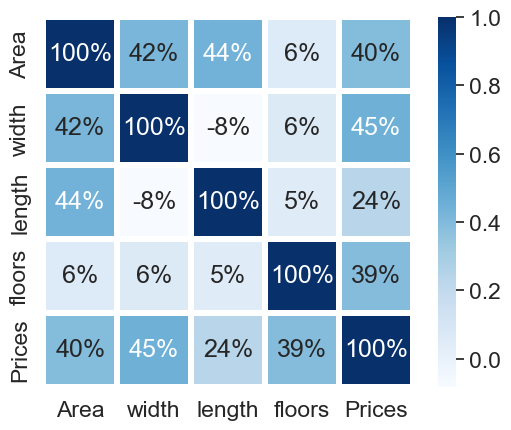

In [147]:
cols_pv = ['Area','width','length','floors','Prices']

sns.heatmap(df[cols_pv].corr(),annot=True, linewidths=3, square=True, cmap='Blues', fmt=".0%")


<h2>Kết Luận</h2>

Các biến ảnh hưởng đến Prices:

- Are
- length
- width
- District
- certificate
- floors


## Lable Encoding

In [148]:
df['District'].unique()

array(['cẩm lệ', 'hải châu', 'thanh khê', 'ngũ hành sơn', 'sơn trà',
       'liên chiểu', 'hòa vang'], dtype=object)

Chuyển dữ liệu trường District về dạnh số

- cẩm lệ -> 0
- hải châu -> 1
- thanh khê -> 2
- ngũ hành sơn -> 3
- sơn trà -> 4
- liên chiểu -> 5
- hòa vang -> 6

In [149]:
from sklearn.preprocessing import LabelEncoder

# Khởi tạo LabelEncoder
le = LabelEncoder()

df['District'] = le.fit_transform(df['District'])


In [150]:
type_map = {'Nhà trong hẻm':0,'Nhà mặt tiền':1}
df['type']=le.fit_transform(df['type'].map(type_map))

In [151]:
df['certificate']= le.fit_transform(df['certificate'])

In [152]:
df.head(5)

,Unnamed: 0,Street,Ward,District,Prices,Area,toFace,type,certificate,width,length,floors,Location,Latitude,Longitude,DistanceToCenter,DistanceToBeach
0,0,Hà Mục,Hòa Thọ Đông,0,5.15,100.0,Tây Nam,1,1,5.000000,20.000000,4.0,"16.01918,108.19537",16.01918,108.195374,5.750916,7.862720
1,1,Thi Sách,Hòa Thuận Tây,2,4.10,85.0,Không,1,1,9.219544,9.219544,1.0,"16.0546,108.20547",16.05460,108.205467,2.389182,4.683770
2,2,Ông Ích Khiêm,Tam Thuận,6,11.00,67.0,Tây,1,0,3.800000,17.631579,3.0,"16.06653,108.2142",16.06653,108.214203,1.465144,3.435286
3,3,Núi Thành,Hòa Cường Bắc,2,17.50,137.0,Tây,1,0,7.300000,18.767123,3.0,"16.03194,108.22279",16.03194,108.222794,3.281117,4.948860
4,4,Trương Văn Hiến,Khuê Mỹ,4,7.00,90.0,Đông Nam,1,0,5.000000,18.000000,4.0,"16.01947,108.25592",16.01947,108.255920,5.590678,5.759550


# Chia Train/Test

In [153]:
from sklearn.model_selection import train_test_split
house = df[['Prices','District','Area','type','certificate','width','length','floors','DistanceToCenter','DistanceToBeach']]
df_train, df_test = train_test_split(house, test_size = 0.2, random_state=42)

print(df_train.shape)
print(df_test.shape)

(11688, 10)
(2923, 10)


In [154]:
# X_train = df_train.copy()
# X_test = df_test.copy()

# print("X_train: {0}".format(X_train.shape))
# print("X_test: {0}".format(X_test.shape))

In [155]:
# y_train = X_train.pop('Prices')
# y_test = X_test.pop('Prices')
# print("Y_train: {0}".format(y_train.shape))
# print("y_test: {0}".format(y_test.shape))

## Outlier

In [156]:
data = df_train.copy()

In [157]:
uppper_boundary=df_train['Prices'].mean() + 3* df_train['Prices'].std()
lower_boundary=df_train['Prices'].mean() - 3* df_train['Prices'].std()
print("Biên trên:",uppper_boundary)

Biên trên: 30.176880556665314


In [158]:
df_train.loc[(df_train.Prices>uppper_boundary),'Prices'] = uppper_boundary

<Axes: xlabel='Prices', ylabel='Count'>

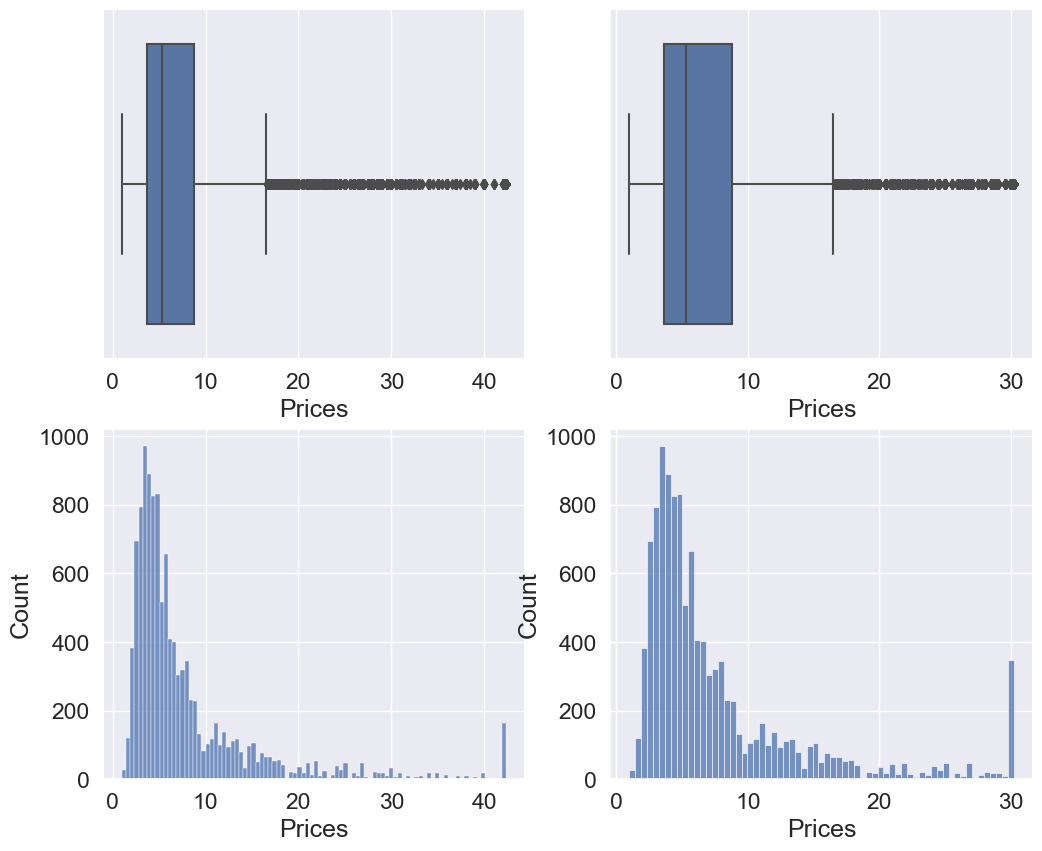

In [159]:
fig, axes = plt.subplots(ncols=2,nrows=2, figsize=(12,10))
sns.boxplot(data=data,x='Prices',ax=axes[0][0])
sns.boxplot(data=df_train,x='Prices',ax=axes[0][1])
sns.histplot(data=data,x='Prices',ax=axes[1][0])
sns.histplot(data=df_train,x='Prices',ax=axes[1][1])

In [160]:
uppper_boundary=df_train['Area'].mean() + 3* df_train['Area'].std()
print("Biên trên:",uppper_boundary)

Biên trên: 225.57128020782113


In [161]:
df_train.loc[(df_train.Area>uppper_boundary),'Area'] = uppper_boundary

<Axes: xlabel='Area', ylabel='Count'>

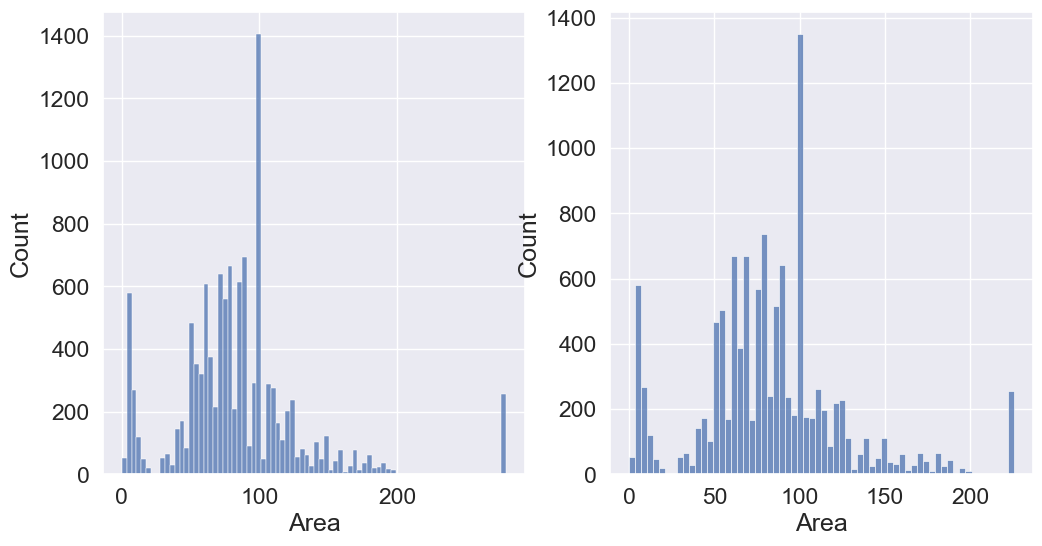

In [162]:
fig, axes = plt.subplots(ncols=2, figsize=(12,6))
sns.histplot(data=data,x='Area',ax=axes[0])
sns.histplot(data=df_train,x='Area',ax=axes[1])

In [163]:
uppper_boundary=df_train['floors'].mean() + 3* df_train['floors'].std()
print("Biên trên:",uppper_boundary)

Biên trên: 6.265246554210303


In [164]:
df_train.loc[(df_train.floors>uppper_boundary),'floors']=int(uppper_boundary)

<Axes: xlabel='floors'>

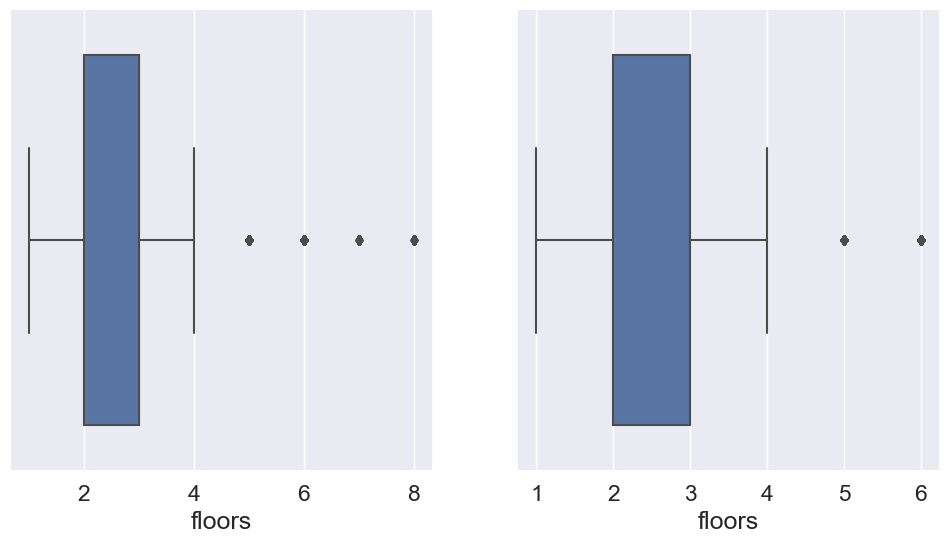

In [165]:
fig, axes = plt.subplots(ncols=2, figsize=(12,6))
sns.boxplot(data=data,x='floors',ax=axes[0])
sns.boxplot(data=df_train,x='floors',ax=axes[1])

In [166]:
uppper_boundary=df_train['width'].mean() + 3* df_train['width'].std()
print("Biên trên:",uppper_boundary)
df_train.loc[(df_train.width>uppper_boundary),'width'] = uppper_boundary

Biên trên: 13.764014937380768


<Axes: xlabel='width'>

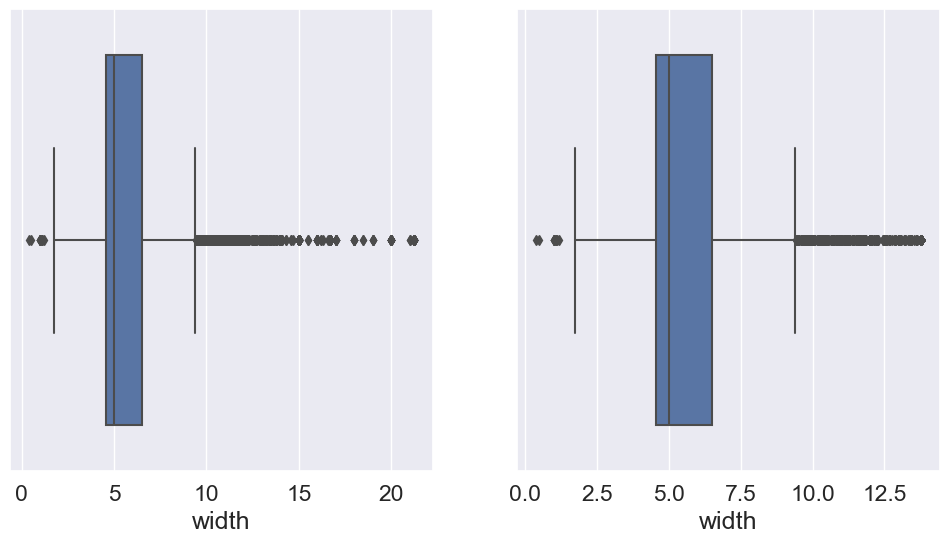

In [167]:
fig, axes = plt.subplots(ncols=2, figsize=(12,6))
sns.boxplot(data=data,x='width',ax=axes[0])
sns.boxplot(data=df_train,x='width',ax=axes[1])

In [168]:
uppper_boundary=df_train['length'].mean() + 3* df_train['length'].std()
print("Biên trên:",uppper_boundary)
df_train.loc[(df_train.length>uppper_boundary),'length'] = uppper_boundary

Biên trên: 37.86835698536244


<Axes: xlabel='length'>

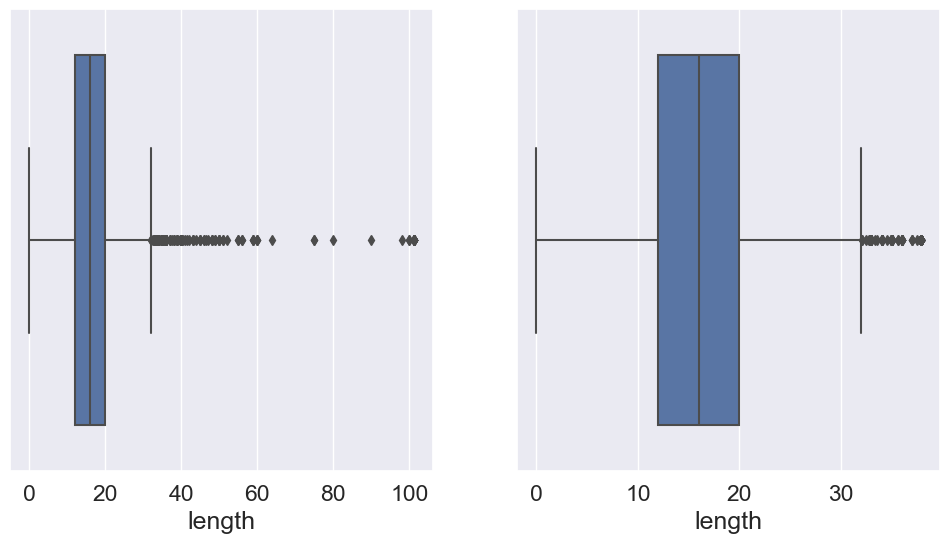

In [169]:
fig, axes = plt.subplots(ncols=2, figsize=(12,6))
sns.boxplot(data=data,x='length',ax=axes[0])
sns.boxplot(data=df_train,x='length',ax=axes[1])

## Feature Transformation

In [170]:
data=df_train.copy()

In [171]:
import scipy.stats as stat
def plot_data(feature):
    plt.figure(figsize=(10,6))

    plt.subplot(2,2,1)
    stat.probplot(data[feature],dist='norm',plot=plt)# prob plot

    plt.subplot(2,2,2)
    stat.probplot(df_train[feature],dist='norm',plot=plt)# prob plot

    plt.subplot(2,2,3)
    sns.histplot(data[feature])

    plt.subplot(2,2,4)
    sns.histplot(df_train[feature])
    
    plt.show()

Chuẩn hóa các trường Area, width, length với chuẩn hóa Normalizer

In [172]:
from sklearn.preprocessing import MaxAbsScaler,Normalizer,StandardScaler,RobustScaler,PowerTransformer
scaler = Normalizer()
temp = df_train[['Area','width','length']]
df_train =  pd.DataFrame(scaler.fit_transform(df_train),columns=df_train.columns)
df_test =  pd.DataFrame(scaler.transform(df_test),columns=df_test.columns)
# df_test.loc[:,['Area','width','length']] = (scaler.transform(df_test[['Area','width','length']]))
# temp

Chuẩn hóa trường Prices với phương pháp chuẩn hóa PowerTransformer

In [173]:
# scaler = PowerTransformer()
# df_train['Prices'] = scaler.fit_transform(df_train[['Prices']])
# df_train.loc[:,['Prices']] = (scaler.fit_transform(df_train[['Prices']]))
# df_test.loc[:,['Prices']] = (scaler.transform(df_test[['Prices']]))

<Axes: xlabel='Area', ylabel='Prices'>

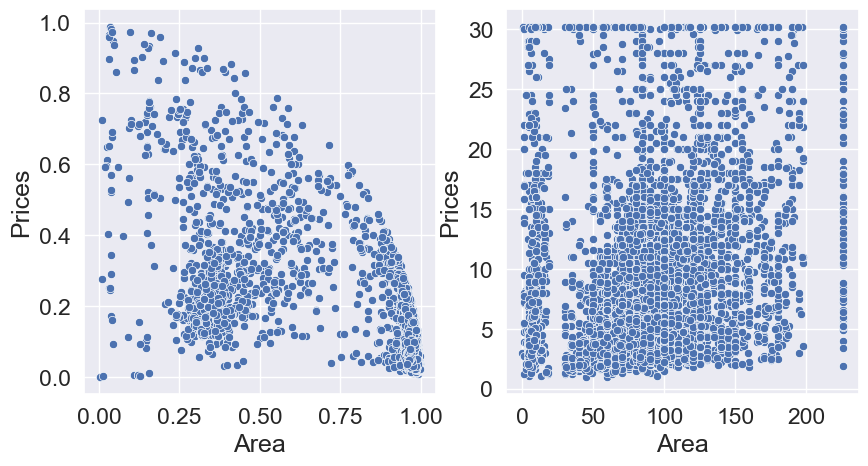

In [174]:
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(10, 5))
sns.scatterplot(data=df_train,x='Area',y='Prices',ax=axes[0])
sns.scatterplot(data=data,x='Area',y='Prices',ax=axes[1])

<Axes: xlabel='width', ylabel='Prices'>

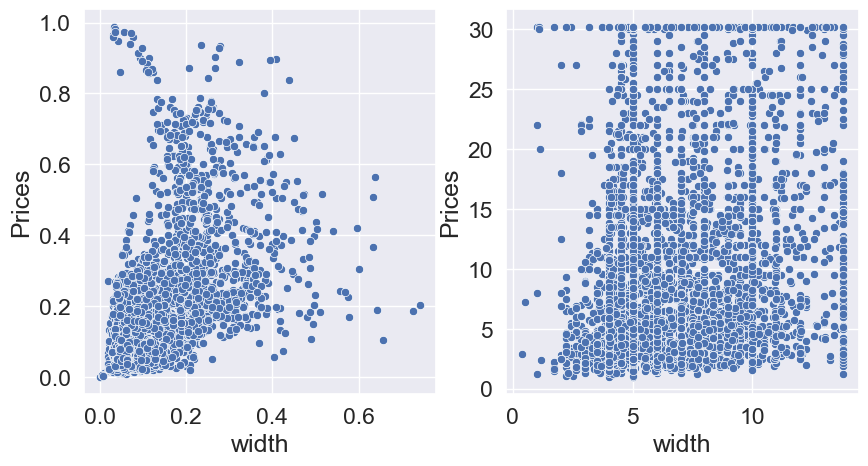

In [175]:
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(10, 5))
sns.scatterplot(data=df_train,x='width',y='Prices',ax=axes[0])
sns.scatterplot(data=data,x='width',y='Prices',ax=axes[1])

<Axes: xlabel='length', ylabel='Prices'>

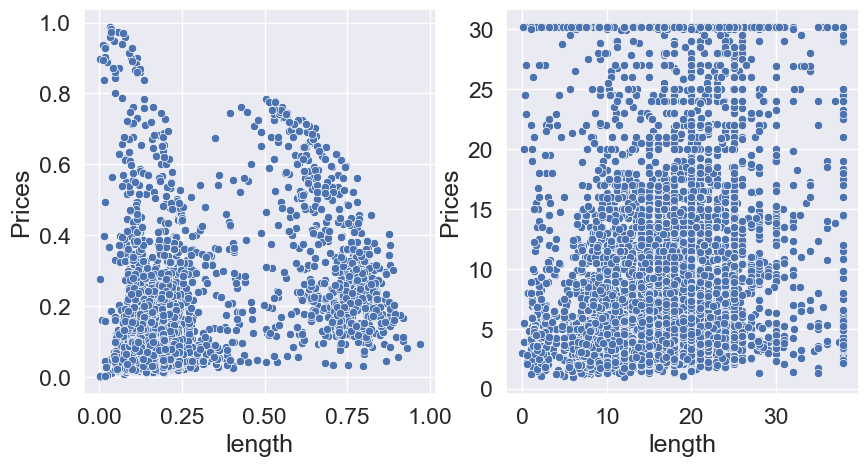

In [176]:
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(10, 5))
sns.scatterplot(data=df_train,x='length',y='Prices',ax=axes[0])
sns.scatterplot(data=data,x='length',y='Prices',ax=axes[1])

In [177]:
df_train.head()

,Prices,District,Area,type,certificate,width,length,floors,DistanceToCenter,DistanceToBeach
0,0.090620,0.085490,0.957493,0.000000,0.000000,0.068392,0.239373,0.068392,0.008609,0.030939
1,0.857683,0.056844,0.454749,0.028422,0.028422,0.113687,0.113687,0.142109,0.029142,0.076438
2,0.056282,0.038815,0.970372,0.000000,0.000000,0.097037,0.194074,0.038815,0.023017,0.067718
3,0.047091,0.109514,0.967373,0.000000,0.000000,0.132879,0.132879,0.036505,0.061165,0.097933
4,0.050614,0.000000,0.973353,0.009734,0.000000,0.048668,0.194671,0.029201,0.057996,0.073800


In [178]:
df_test.head()

,Prices,District,Area,type,certificate,width,length,floors,DistanceToCenter,DistanceToBeach
0,0.123042,0.000000,0.968832,0.009688,0.000000,0.048442,0.193766,0.029065,0.045318,0.057809
1,0.054723,0.039088,0.977189,0.007818,0.000000,0.039088,0.195438,0.015635,0.018463,0.014425
2,0.123406,0.027424,0.973539,0.013712,0.000000,0.115538,0.115538,0.041135,0.048467,0.072889
3,0.087242,0.058161,0.969353,0.009694,0.009694,0.048468,0.193871,0.029081,0.055030,0.073246
4,0.118746,0.026098,0.965631,0.013049,0.000000,0.058721,0.208785,0.039147,0.027282,0.057348


## Tách đặc trưng

In [179]:
X_train = df_train.copy()
X_test = df_test.copy()

print("X_train: {0}".format(X_train.shape))
print("X_test: {0}".format(X_test.shape))

X_train: (11688, 10)
X_test: (2923, 10)


In [180]:
y_train = X_train.pop('Prices')
y_test = X_test.pop('Prices')

In [181]:
print("Y_train: {0}".format(y_train.shape))
print("y_test: {0}".format(y_test.shape))

Y_train: (11688,)
y_test: (2923,)


# Linear Regression (Trinh)

In [182]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

# Dùng LinerRegression
model_LR = LinearRegression()
model_LR.fit(X_train, y_train)
# Dự đoán
predictions_LR  = model_LR.predict(X_test)
rs = {
  "Price_Test": y_test[:10],
  "Price_Predict": predictions_LR[:10]
}

df_predict = pd.DataFrame(rs)
print(df_predict)

   Price_Test  Price_Predict
0    0.123042       0.084525
1    0.054723       0.085863
2    0.123406       0.118139
3    0.087242       0.064930
4    0.118746       0.099647
5    0.068143       0.093956
6    0.033369       0.062197
7    0.066961       0.079933
8    0.161505       0.240929
9    0.032509       0.044512


In [183]:
from sklearn.metrics import r2_score 
r2_score_LR = r2_score(y_test,predictions_LR)
print(r2_score_LR)

0.7384172876091764


In [184]:
from sklearn.metrics import mean_squared_error 
import numpy as np

rmse_LR = np.sqrt(mean_squared_error(y_test, predictions_LR))
print(rmse_LR)

0.0588923558294593


In [185]:
from sklearn.metrics import mean_absolute_error

mae_LR = mean_absolute_error(y_test, predictions_LR)
print(mae_LR)

0.03639915768674211


In [186]:
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LinearRegression
# Tạo dữ liệu huấn luyện và nhãn tương ứng


# Khởi tạo mô hình Random Forest Regression
model = LinearRegression()

# Áp dụng cross-validation với 5 folds
scores = cross_val_score(model,X_train, y_train, cv=5)

# In kết quả của các fold
for i, score in enumerate(scores):
    print(f"Fold {i+1}: {score}")

# In kết quả trung bình của cross-validation
print("Average Score:", np.mean(scores))

Fold 1: 0.7910334395911778
Fold 2: 0.7560717086527216
Fold 3: 0.7673796321170611
Fold 4: 0.7640372533720672
Fold 5: 0.7672020013301291
Average Score: 0.7691448070126313


In [187]:
data_LR = {'y_test': y_test, 'y_prediction': predictions_LR}
data_LR = pd.DataFrame(data = data_LR)

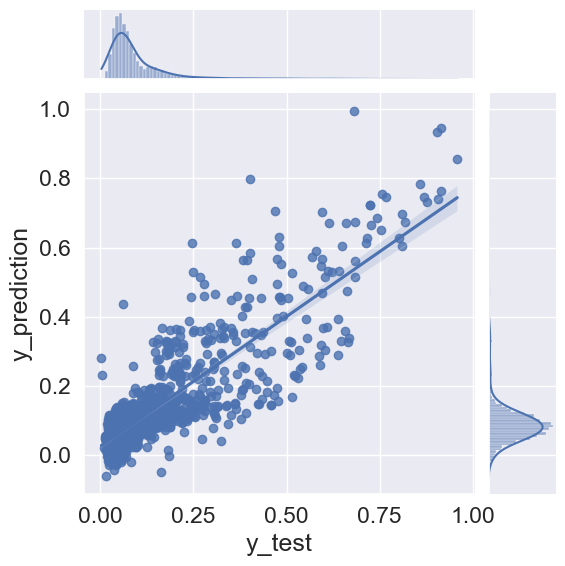

In [188]:
#Linear Regression
sns.jointplot(data = data_LR, x="y_test", y="y_prediction", kind='reg')

### Tìm siêu tham số cho mô hình linear regression
Các siêu tham số quan trọng nhất trong mô hình Linear Regression bao gồm:

- Intercept (fit_intercept): Siêu tham số này quyết định liệu mô hình có sử dụng điểm cắt với trục y hay không. Nếu fit_intercept=True, mô hình sẽ có một điểm cắt với trục y. Nếu fit_intercept=False, mô hình sẽ đi qua gốc tọa độ (0,0). Mặc định, fit_intercept=True.

- Tham số copy_X quyết định liệu có sao chép (copy) các dữ liệu đầu vào (X) hay không. Nếu copy_X=True, dữ liệu đầu vào sẽ được sao chép trước khi huấn luyện mô hình để đảm bảo rằng dữ liệu gốc không bị thay đổi. Nếu copy_X=False, dữ liệu đầu vào sẽ được sử dụng trực tiếp. Mặc định, copy_X=True.

- Tham số positive quyết định liệu các hệ số trong mô hình Linear Regression có bị giới hạn là các giá trị dương hay không. Nếu positive=True, các hệ số sẽ bị giới hạn là các giá trị dương. Tham số này thường được sử dụng trong các bài toán mà các biến độc lập phải có ảnh hưởng dương đối với biến phụ thuộc. Mặc định, positive=False.

In [189]:
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LinearRegression
import numpy as np

# Khởi tạo mô hình Linear Regression
model = LinearRegression()
model.fit(X_train, y_train)

# Thiết lập các giá trị tham số để thử nghiệm
param_grid = {'fit_intercept': [True, False],
              'copy_X': [True, False],
              'positive': [True, False],
              'n_jobs':[1,2,3]}

# Sử dụng Grid Search để tìm kiếm giá trị tốt nhất cho các tham số
grid_search = GridSearchCV(model, param_grid=param_grid, cv=5)
grid_search.fit(X_train, y_train)

# In kết quả tốt nhất
print("Best parameters:", grid_search.best_params_)
print("Best score:", grid_search.best_score_)

Best parameters: {'copy_X': True, 'fit_intercept': True, 'n_jobs': 1, 'positive': False}
Best score: 0.7691448070126313


### Áp dụng siêu tham số vào mô hình

In [190]:
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LinearRegression
# Tạo dữ liệu huấn luyện và nhãn tương ứng


# Khởi tạo mô hình Random Forest Regression
model = LinearRegression(copy_X = True, fit_intercept = True, n_jobs = 1, positive = False)

# Áp dụng cross-validation với 5 folds
scores = cross_val_score(model,X_train, y_train, cv=5)

# In kết quả của các fold
for i, score in enumerate(scores):
    print(f"Fold {i+1}: {score}")

# In kết quả trung bình của cross-validation
print("Average Score:", np.mean(scores))

Fold 1: 0.7910334395911778
Fold 2: 0.7560717086527216
Fold 3: 0.7673796321170611
Fold 4: 0.7640372533720672
Fold 5: 0.7672020013301291
Average Score: 0.7691448070126313


Kết luận: Áp dụng siêu tham số vào mô hình không giúp tăng độ chính xác cho mô hình linear regression

 Chia tập train/test

- Are
- length
- width
- District
- certificate
- floors

In [363]:
data_cp.isnull().sum()

Street         0
Ward           0
District       0
Prices         0
Area           0
toFace         0
type           0
certificate    0
width          0
length         0
floors         0
dtype: int64

# label encoding 

In [364]:
data_cp = data_cp[['District','Prices','Area','certificate','width','length','floors']]

In [365]:
data_cp['District'] = le.fit_transform(data_cp['District'])


In [366]:
data_cp['certificate']= le.fit_transform(data_cp['certificate'])

In [367]:
data_cp

,District,Prices,Area,certificate,width,length,floors
0,0,5.15,100.0,1,5.000000,20.000000,4
1,2,4.10,85.0,1,9.219544,9.219544,1
2,6,11.00,67.0,0,3.800000,17.631579,3
3,2,17.50,137.0,0,7.300000,18.767123,3
4,4,7.00,90.0,0,5.000000,18.000000,4
...,...,...,...,...,...,...,...
1074,0,4.90,400.0,0,5.000000,20.000000,3
1075,4,5.00,70.0,0,4.500000,15.000000,2
1076,4,11.80,65.0,0,4.500000,15.000000,5
1077,4,8.20,100.0,1,5.555556,18.000000,2


In [368]:
data_cp['certificate']==0

0       False
1       False
2        True
3        True
4        True
        ...  
1074     True
1075     True
1076     True
1077    False
1078     True
Name: certificate, Length: 944, dtype: bool

In [369]:
from sklearn.model_selection import train_test_split
df_train, df_test = train_test_split(data_cp, test_size = 0.3, random_state=42, )

print(df_train.shape)
print(df_test.shape)


(660, 7)
(284, 7)


In [386]:
df_train

,District,Prices,Area,certificate,width,length,floors
573,2,13.500,85.0,0,4.1,20.5,3
429,2,4.700,80.0,0,5.0,16.0,2
554,2,6.250,65.0,0,4.3,15.0,2
424,0,2.150,94.0,0,5.0,18.8,1
139,3,3.200,60.0,0,6.0,10.0,3
...,...,...,...,...,...,...,...
111,4,4.500,40.0,0,4.0,10.0,1
400,4,7.200,95.0,0,5.0,19.0,3
994,2,4.100,90.0,0,4.5,20.0,2
566,2,4.650,75.0,0,4.5,16.6,2


In [371]:
df_test

,District,Prices,Area,certificate,width,length,floors
100,4,15.500,90.529095,0,10.000000,9.052909,3
395,5,28.500,57.000000,0,12.500000,21.000000,9
944,2,3.800,90.000000,0,5.000000,18.000000,3
24,4,14.500,185.000000,0,10.000000,18.500000,4
31,3,3.350,60.000000,0,6.000000,10.000000,2
...,...,...,...,...,...,...,...
820,4,5.700,99.000000,0,9.949874,9.949874,2
342,5,3.600,75.000000,0,5.000000,17.000000,2
82,4,15.799,106.000000,0,5.000000,21.200000,4
155,2,4.500,76.000000,0,4.000000,19.000000,1


<Axes: >

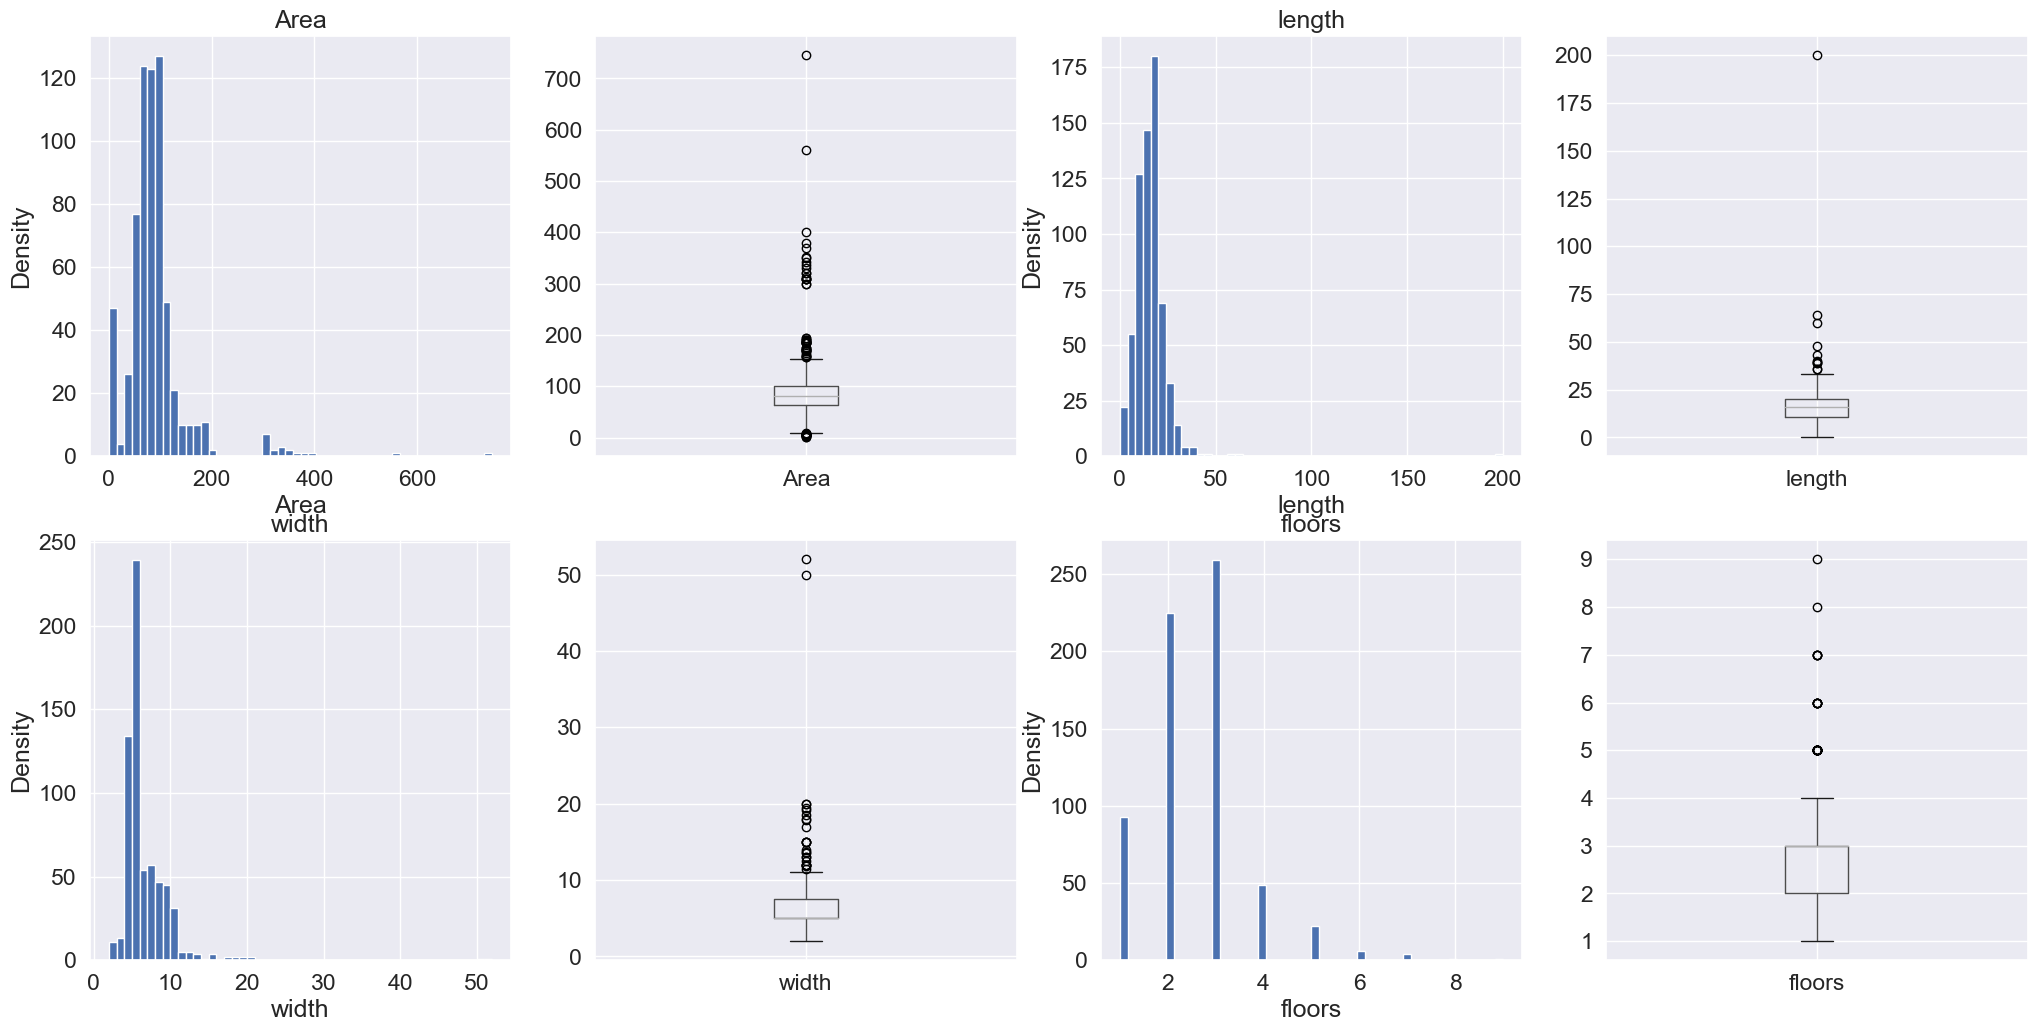

In [372]:
plt.figure(figsize=(25,12))

plt.subplot(2,4,1)
figure=df_train.Area.hist(bins=50)
figure.set_title('Area')
figure.set_xlabel('Area')
figure.set_ylabel('Density')
plt.subplot(2,4,2)
df_train.boxplot(column="Area")

plt.subplot(2,4,3)
figure=df_train.length.hist(bins=50)
figure.set_title('length')
figure.set_xlabel('length')
figure.set_ylabel('Density')
plt.subplot(2,4,4)
df_train.boxplot(column="length")

plt.subplot(2,4,5)
figure=df_train.width.hist(bins=50)
figure.set_title('width')
figure.set_xlabel('width')
figure.set_ylabel('Density')
plt.subplot(2,4,6)
df_train.boxplot(column="width")

plt.subplot(2,4,7)
figure=df_train.floors.hist(bins=50)
figure.set_title('floors')
figure.set_xlabel('floors')
figure.set_ylabel('Density')
plt.subplot(2,4,8)
df_train.boxplot(column="floors")



Kết luận : áp dụng ngoại lệ cho các biến Area, width, length, floors

In [373]:
# Áp dụng ngoại lệ lên tập train
uppper_boundary=df_train['Area'].mean() + 3* df_train['Area'].std()
print("Biên trên:",uppper_boundary)

df_train.loc[(df_train.Area>uppper_boundary),'Area'] = uppper_boundary

Biên trên: 276.67987298800466


In [374]:
uppper_boundary=df_train['width'].mean() + 3* df_train['width'].std()
print("Biên trên:",uppper_boundary)
df_train.loc[(df_train.width>uppper_boundary),'width'] = uppper_boundary

Biên trên: 17.109477068878483


In [375]:
uppper_boundary=df_train['length'].mean() + 3* df_train['length'].std()
print("Biên trên:",uppper_boundary)
df_train.loc[(df_train.length>uppper_boundary),'length'] = uppper_boundary

Biên trên: 46.643242886517754


In [376]:
uppper_boundary=df_train['floors'].mean() + 3* df_train['floors'].std()
print("Biên trên:",uppper_boundary)

df_train.loc[(df_train.floors>uppper_boundary),'floors']=int(uppper_boundary)

Biên trên: 5.8919196008747665


# Trực quan sau khi xử lý ngoại lệ cho tập train

<Axes: >

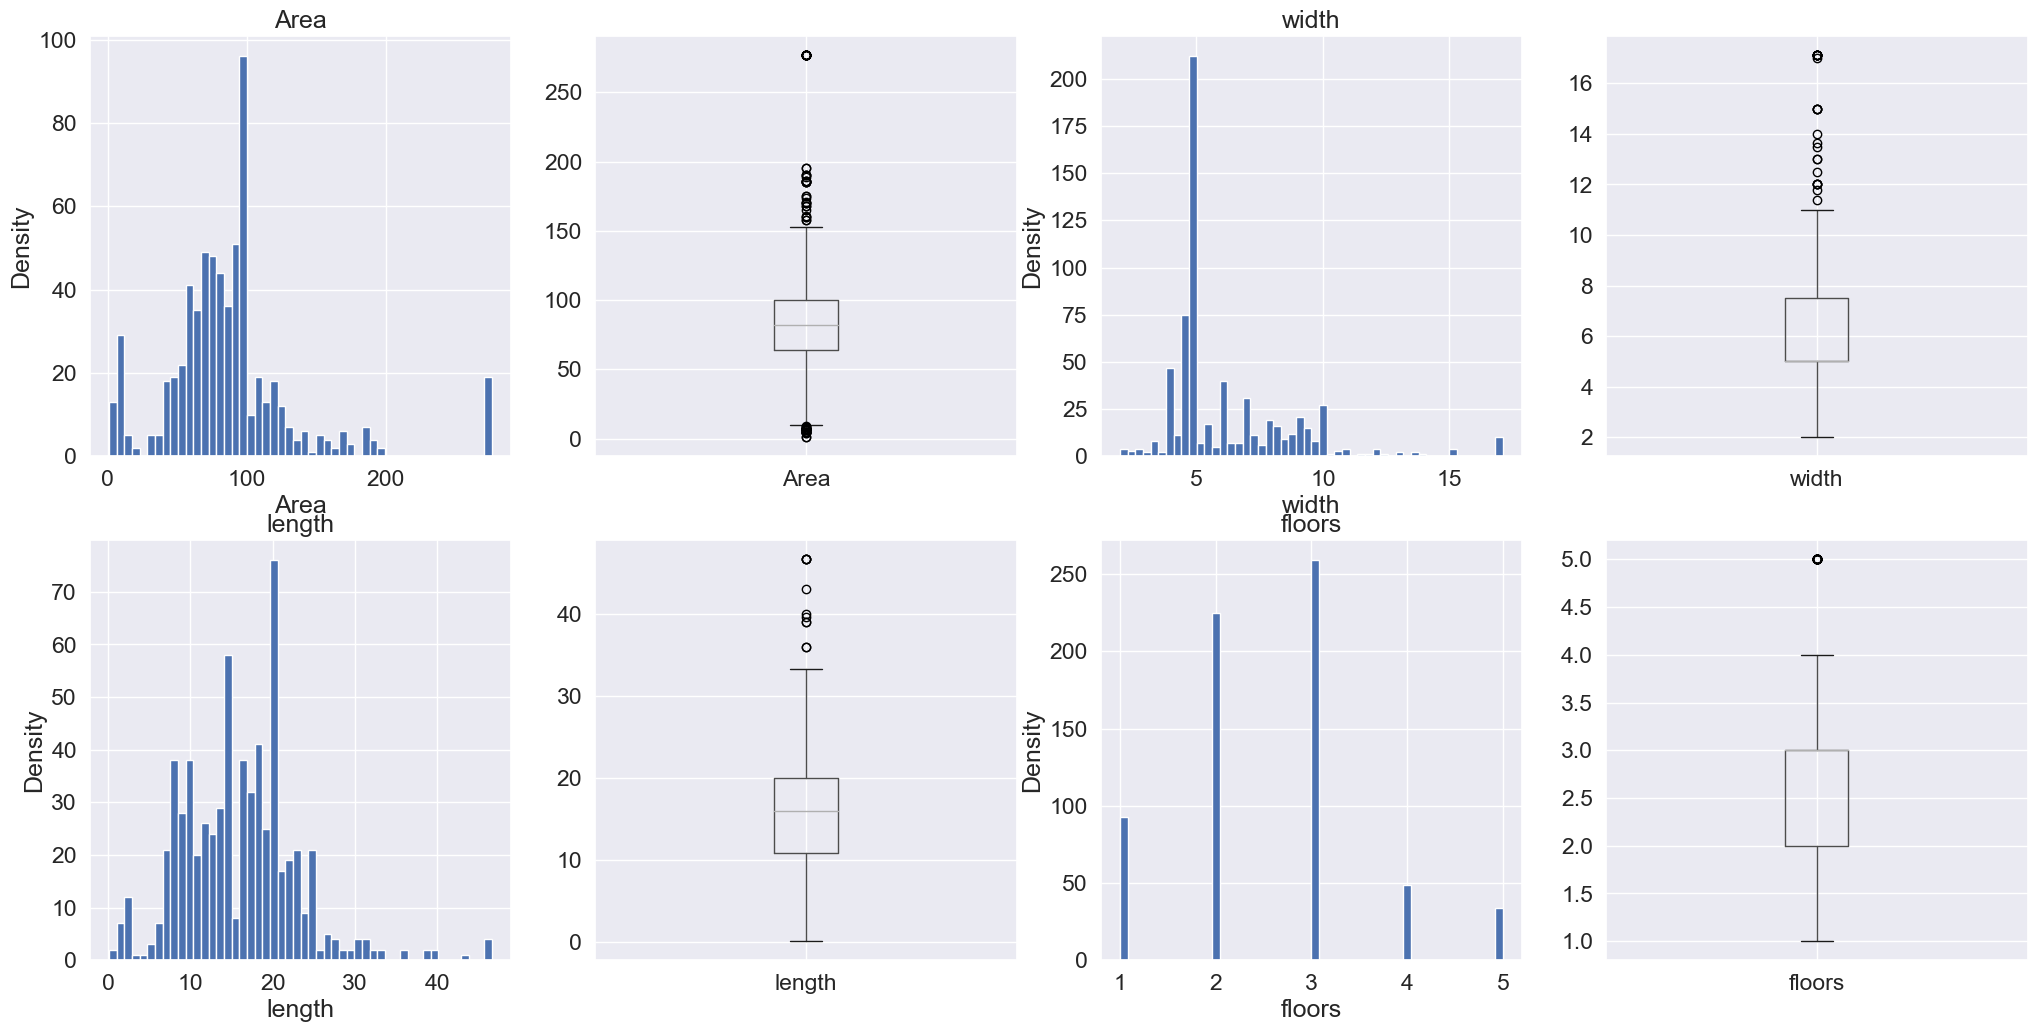

In [377]:
plt.figure(figsize=(25,12))

plt.subplot(2,4,1)
figure = df_train.Area.hist(bins=50)
figure.set_title('Area')
figure.set_xlabel('Area')
figure.set_ylabel('Density')
plt.subplot(2,4,2)
df_train.boxplot(column="Area")

plt.subplot(2,4,3)
figure = df_train.width.hist(bins=50)
figure.set_title('width')
figure.set_xlabel('width')
figure.set_ylabel('Density')
plt.subplot(2,4,4)
df_train.boxplot(column="width")

plt.subplot(2,4,5)
figure = df_train.length.hist(bins=50)
figure.set_title('length')
figure.set_xlabel('length')
figure.set_ylabel('Density')
plt.subplot(2,4,6)
df_train.boxplot(column="length")

plt.subplot(2,4,7)
figure = df_train.floors.hist(bins=50)
figure.set_title('floors')
figure.set_xlabel('floors')
figure.set_ylabel('Density')
plt.subplot(2,4,8)
df_train.boxplot(column="floors")

In [378]:
# Có xử lý ngoại lệ
X_train = df_train.copy()
X_test = df_test.copy()

print("X_train: {0}".format(X_train.shape))
print("X_test: {0}".format(X_test.shape))

X_train: (660, 7)
X_test: (284, 7)


In [379]:
y_train = X_train.pop('Prices')
y_test = X_test.pop('Prices')

# Chuẩn hóa dữ liệu tập train

In [380]:
from sklearn.preprocessing import Normalizer
scaler = Normalizer()
X_train_norm = pd.DataFrame(scaler.fit_transform(X_train),columns=X_train.columns)
X_test_norm = pd.DataFrame(scaler.transform(X_test),columns=X_test.columns)

In [381]:
X_train_norm.head()

,District,Area,certificate,width,length,floors
0,0.022829,0.970237,0.0,0.046800,0.233998,0.034244
1,0.024454,0.978159,0.0,0.061135,0.195632,0.024454
2,0.029892,0.971504,0.0,0.064269,0.224193,0.029892
3,0.000000,0.979196,0.0,0.052085,0.195839,0.010417
4,0.048964,0.979274,0.0,0.097927,0.163212,0.048964


In [387]:
X_test_norm.head()

,District,Area,certificate,width,length,floors
0,0.043637,0.987608,0.0,0.109093,0.098761,0.032728
1,0.079533,0.906677,0.0,0.198833,0.334039,0.143160
2,0.021742,0.978376,0.0,0.054354,0.195675,0.032613
3,0.021473,0.993143,0.0,0.053683,0.099314,0.021473
4,0.048996,0.979927,0.0,0.097993,0.163321,0.032664


## Xây dựng model linear regression

In [388]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

# Dùng LinerRegression
model_LR = LinearRegression()
model_LR.fit(X_train_norm, y_train)


LinearRegression()

In [389]:
# Dự đoán
predictions_LR  = model_LR.predict(X_test_norm)

In [390]:
from sklearn.metrics import r2_score 
r2_score_LR = r2_score(y_test,predictions_LR)
print(r2_score_LR)

0.06741187552807015


In [391]:
rs = {
  "Price_Test": y_test[:10],
  "Price_Predict": predictions_LR[:10]
}

df_predict = pd.DataFrame(rs)
print(df_predict)

     Price_Test  Price_Predict
100   15.500000       8.195766
395   28.500000       7.107711
944    3.800000       7.697079
24    14.500000       8.195158
31     3.350000       7.633859
410    5.600000       8.170033
701    7.300000       8.037967
389    5.300000       7.884978
461    4.550000       7.614453
453    8.092342      17.741117


In [392]:
print("Mean Y_test: {0}".format(np.mean(y_test)))
print("rmse: {0}".format(mean_squared_error(y_test,predictions_LR)**0.5))

Mean Y_test: 8.582415586804409
rmse: 9.636842086260366


# Tìm siêu tham số cho model

# Random Forest Regressor (QKhang)

In [191]:
from sklearn.ensemble import RandomForestRegressor
model_RD = RandomForestRegressor(random_state=123)
model_RD.fit(X_train,y_train)

RandomForestRegressor(random_state=123)

In [192]:

predictions_RD = model_RD.predict(X_test)

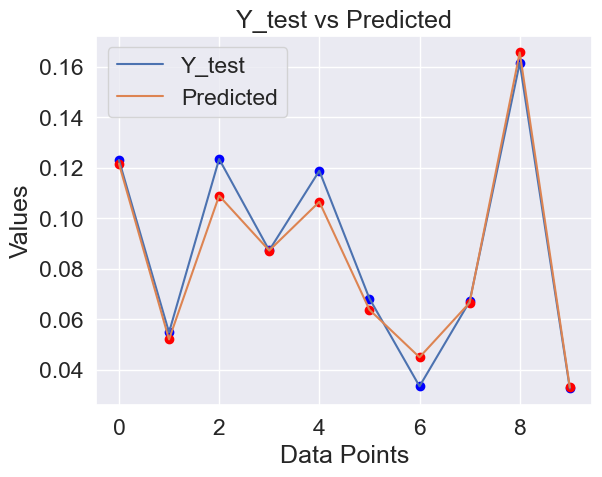

In [193]:
y_actual = y_test[:10]
y_predicted = predictions_RD[:10]
index = range(10)

plt.plot(index,y_actual, label='Y_test')
plt.scatter(index, y_actual, color='blue')
plt.plot(index,y_predicted, label='Predicted')
plt.scatter(range(len(y_predicted)), y_predicted, color='red')

plt.xlabel('Data Points')
plt.ylabel('Values')

plt.title('Y_test vs Predicted')
plt.legend()

plt.show()


In [194]:
from sklearn.model_selection import cross_val_score
from sklearn.metrics import make_scorer, r2_score
model =RandomForestRegressor(random_state=123)
scorer = make_scorer(r2_score)

r2_scores = cross_val_score(model, X_train, y_train, cv=5, scoring=scorer)

for i, score in enumerate(r2_scores):
    print(f"Fold {i+1}: {score}")
print("Average Score:", np.mean(r2_scores))



Fold 1: 0.954652844557576
Fold 2: 0.9553519939258449
Fold 3: 0.963139124340042
Fold 4: 0.9569321896109871
Fold 5: 0.9526943055928409
Average Score: 0.9565540916054582


In [195]:
from sklearn.model_selection import KFold
from sklearn.metrics import mean_squared_error
kfold = KFold(n_splits=5)
kfold = kfold.split(X_train, y_train)
rmses = []

for k, (i_train, i_test) in enumerate(kfold):
    model_RD.fit(X_train.iloc[i_train, :], y_train.iloc[i_train])
    rmse = mean_squared_error( y_train.iloc[i_test],model_RD.predict(X_train.iloc[i_test, :]))**0.5
    rmses.append(rmse)
    print('Fold: {0} : rmse = {1}'.format(k,rmse))
 
print('\n\nCross-Validation:\n mean {0} \n std: {1}'.format(np.mean(rmses), np.std(rmses)))

Fold: 0 : rmse = 0.026381199047374914
Fold: 1 : rmse = 0.024569256568093313
Fold: 2 : rmse = 0.02204498166740212
Fold: 3 : rmse = 0.02289958233568001
Fold: 4 : rmse = 0.023891382981964925


Cross-Validation:
 mean 0.02395728052010306 
 std: 0.0014852508574022996


### Tìm siêu tham số cho mô hình

Các siêu tham số của mô hình

- n_estimators: Số lượng cây quyết định
- max_depth: Độ sâu tối đa của các cây quyết định
- min_samples_split: Số lượng mẫu tối thiểu yêu cầu để phân chia một nút.
- min_samples_leaf: Số lượng mẫu tối thiểu yêu cầu để tạo ra một lá
- max_features: Số lượng đặc trưng tối đa được xem xét để tìm kiếm phân chia tốt nhất (sqrt, log2)


In [196]:

param_grid = {
    'max_depth': [5,10,50],
    'max_features': ['log2', 'sqrt'],
    'min_samples_leaf': [1, 2, 5,10],
    'min_samples_split': [1,2, 5, 10],
}
# param_grid = {
#     'max_depth': [50, 80, 100],
#     'max_features': ['auto', 'sqrt'],
#     'min_samples_leaf': [1, 2, 4],
#     'min_samples_split': [2, 5, 10],
# }


In [197]:
# from sklearn.model_selection import GridSearchCV

# grid_search = GridSearchCV(estimator=model_RD, param_grid=param_grid, cv=5)
# # Fit the grid search to the data
# grid_fit = grid_search.fit(X_train, y_train)
# best_parameters = grid_fit.best_params_
# best_parameters

In [198]:
model_RD1 = RandomForestRegressor(random_state=123, max_depth=50, max_features='log2', min_samples_leaf=1, min_samples_split=2)
model_RD1.fit(X_train, y_train)
predictions_RD1 = model_RD1.predict(X_test)

In [199]:
from sklearn.metrics import r2_score 
r2_score_RD1 = r2_score(y_test,predictions_RD1)
print(r2_score_RD1)

0.9446114562914653


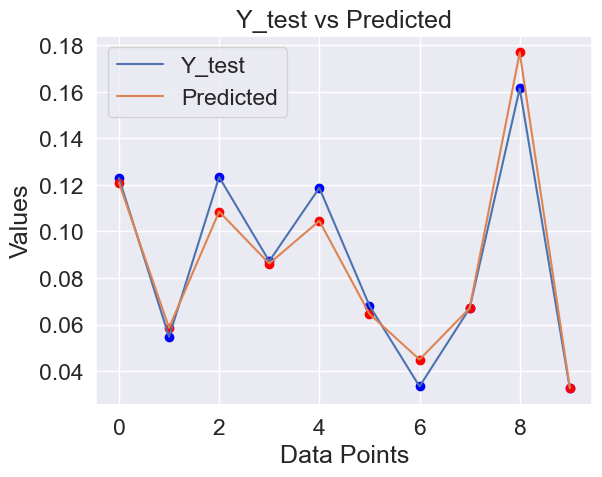

In [200]:
y_actual = y_test[:10]
y_predicted = predictions_RD1[:10]
index = range(10)

plt.plot(index,y_actual, label='Y_test')
plt.scatter(index, y_actual, color='blue')
plt.plot(index,y_predicted, label='Predicted')
plt.scatter(range(len(y_predicted)), y_predicted, color='red')

plt.xlabel('Data Points')
plt.ylabel('Values')

plt.title('Y_test vs Predicted')
plt.legend()

plt.show()


In [201]:
from sklearn.model_selection import cross_val_score
from sklearn.metrics import make_scorer, r2_score
model =RandomForestRegressor(random_state=123, max_depth=50, max_features='log2', min_samples_leaf=2, min_samples_split=10)
scorer = make_scorer(r2_score)

r2_scores = cross_val_score(model, X_train, y_train, cv=5, scoring=scorer)

for i, score in enumerate(r2_scores):
    print(f"Fold {i+1}: {score}")
print("Average Score:", np.mean(r2_scores))



Fold 1: 0.9394626190278254
Fold 2: 0.9382554583850653
Fold 3: 0.9405782536133964
Fold 4: 0.9397613919404264
Fold 5: 0.9346350699770718
Average Score: 0.9385385585887569


In [202]:
from sklearn.model_selection import KFold
from sklearn.metrics import mean_squared_error
kfold = KFold(n_splits=5)
kfold = kfold.split(X_train, y_train)
rmses = []
model =RandomForestRegressor(random_state=123, max_depth=50, max_features='sqrt', min_samples_leaf=2, min_samples_split=10)
for k, (i_train, i_test) in enumerate(kfold):
    model.fit(X_train.iloc[i_train, :], y_train.iloc[i_train])
    rmse = mean_squared_error( y_train.iloc[i_test],model.predict(X_train.iloc[i_test, :]))**0.5
    rmses.append(rmse)
    print('Fold: {0} : rmse = {1}'.format(k,rmse))
 
print('\n\nCross-Validation:\n mean {0} \n std: {1}'.format(np.mean(rmses), np.std(rmses)))

Fold: 0 : rmse = 0.03048114802261295
Fold: 1 : rmse = 0.02889284226500416
Fold: 2 : rmse = 0.027989788944822954
Fold: 3 : rmse = 0.02708249235156575
Fold: 4 : rmse = 0.02808387164533417


Cross-Validation:
 mean 0.028506028645867997 
 std: 0.001142094293092576


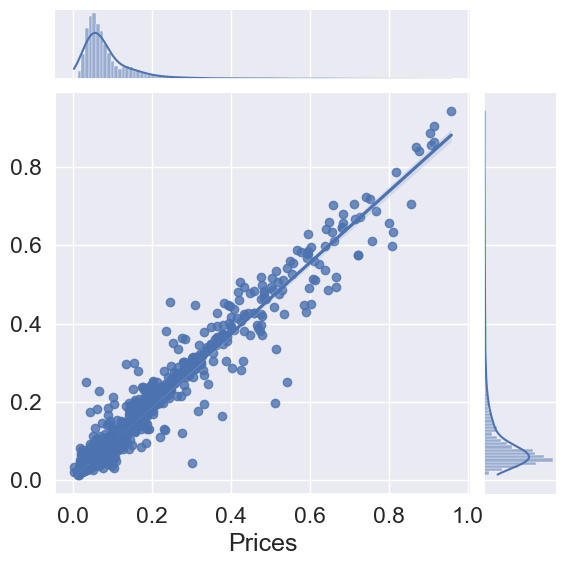

In [203]:
sns.jointplot(x=y_test,y=predictions_RD,kind='reg')

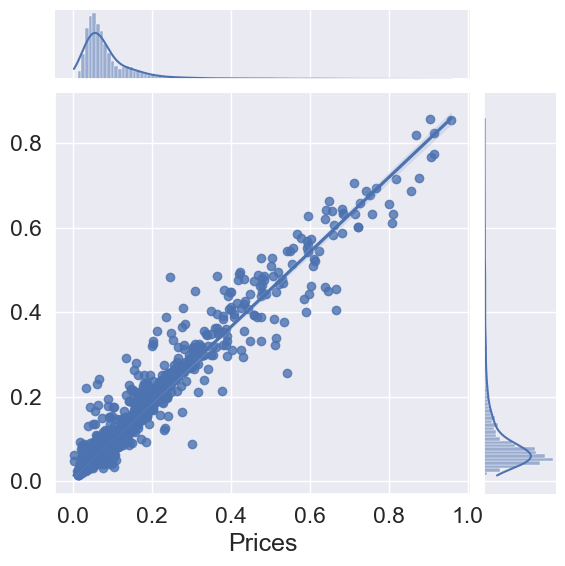

In [204]:
sns.jointplot(x=y_test,y=predictions_RD1,kind='reg')

# Decision Tree Regression (Đức)

In [205]:
# from sklearn.tree import DecisionTreeRegressor
# from sklearn.metrics import mean_squared_error, r2_score

# # X_train, y_train: Tập dữ liệu huấn luyện
# model = DecisionTreeRegressor()
# model.fit(X_train, y_train)

# y_test_pred = model.predict(X_test)
# # Tính toán Mean Squared Error (MSE)
# mse = mean_squared_error(y_test, y_test_pred)
# print("Mean Squared Error on Test Set:", mse)

# # Tính toán R-squared (R2)
# r2 = r2_score(y_test, y_test_pred)
# print("R-squared on Test Set:", r2)

# Đánh giá 3 thuật theo các metrics (Đức)